# __Impacto del coche eléctrico sobre los gases de efecto invernadero emitidos__

### 🧩 Librerias necesarias 🧩

Este script requiere las siguientes librerías para funcionar correctamente:
- __os__ (viene con Python, no necesita instalación)
- __pandas__
- __matplotlib__
- __seaborn__
- __squarify__
- __matplotlib.colors.to_hex__ (parte de matplotlib)

Si no las tienes instaladas, puedes hacerlo ejecutando el siguiente comando:   
    `pip install pandas matplotlib seaborn squarify`

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import squarify
from matplotlib.colors import to_hex

## __Gases de efecto invernadero__

### 📊 Dataset utilizado 📊
__Nombre__: _Greenhouse gas emissions by source sector_ (`env_air_gge`)  
__Fuente oficial__: [Agencia Europea de Medio Ambiente (EEA)](https://www.eea.europa.eu/en)  
__Acceso a los datos__: [Eurostat - Data Browser](https://ec.europa.eu/eurostat/databrowser/view/env_air_gge__custom_17266610/default/table?lang=en)

### 🔍 Descripción general del dataset 🔍
- Frecuencia temporal: Anual (A)
- Unidad de medida: Miles de toneladas (THS_T)
- Cobertura geográfica: Países de la Unión Europea
- Contaminantes incluidos:
    - Dióxido de carbono (CO2)
    - Óxido nitroso (N2O)
    - Metano (CH4)
    - Hidrofluorocarbonos (HFC)
    - Perfluorocarbonos (PFC)
    - Hexafluoruro de azufre (SF6)
    - Trifluoruro de nitrógeno (NF3)
- Clasificación sectorial: Emisiones agrupadas por sector fuente (transporte, industria, agricultura, etc.)

### 🧠 Nota adicional 🧠
Este conjunto de datos es ampliamente utilizado para el análisis de emisiones de gases de efecto invernadero en Europa. La clasificación y codificación siguen los estándares de Eurostat para facilitar la interoperabilidad con otras fuentes ambientales.

### 🧭 Carga de datos 🧭

En este paso se carga el archivo Excel que contiene los datos de emisiones de gases de efecto invernadero. El archivo debe estar ubicado en la carpeta `Datasets originales`, dentro del directorio principal del proyecto.

In [2]:
file_path = os.path.join(os.getcwd(), "Datasets originales", "env_air_gge__custom_15714287_page_spreadsheet.xlsx")

with open(file_path, "rb") as data:
    df_greenhouse_gases = pd.read_excel(data, sheet_name="Data")
df_greenhouse_gases.head(10)

,GEO (Codes),GEO (Labels),TIME,TOTXMEMO,CRF1,CRF1A1,CRF1A2,CRF1A3,CRF1A3A,CRF1A3B,...,CRF1C,CRF1D1,CRF1D2,CRF1D3,CRF2,CRF3,CRF4,CRF5,CRF6,CRF_INDCO2
0,EU27_2020,European Union - 27 countries (from 2020),1990,4649770.44,3741199.78,1442246.90,721407.71,672182.73,11348.39,620116.66,...,NaN,156807.56,0.67,210250.14,450551.75,483165.78,-217472.28,184583.12,NaN,7742.29
1,EU27_2020,European Union - 27 countries (from 2020),1991,4444605.53,3691909.94,1409716.14,678277.58,680852.30,11336.73,629307.69,...,NaN,154118.70,1.14,223185.68,419169.34,455098.05,-316931.49,187794.00,NaN,7565.69
2,EU27_2020,European Union - 27 countries (from 2020),1992,4320714.82,3572830.87,1363222.85,639581.99,702853.18,11603.13,651585.34,...,NaN,159276.13,0.98,221350.93,406060.96,434383.75,-289473.78,189545.26,NaN,7367.76
3,EU27_2020,European Union - 27 countries (from 2020),1993,4226725.66,3514512.39,1311751.92,619343.91,706231.71,11418.36,657461.06,...,NaN,162767.81,0.94,240420.93,396000.85,422919.61,-303318.69,189371.20,NaN,7240.31
4,EU27_2020,European Union - 27 countries (from 2020),1994,4214004.13,3475615.04,1318365.00,617414.61,711670.29,11791.19,663285.15,...,NaN,165812.30,0.86,239770.77,419550.75,417601.43,-294016.11,188156.07,NaN,7096.94
5,EU27_2020,European Union - 27 countries (from 2020),1995,4241086.35,3515882.02,1319044.96,638255.89,724552.50,12735.29,675555.17,...,NaN,168992.17,1.33,245043.95,430774.32,417485.66,-317482.77,187518.72,NaN,6908.40
6,EU27_2020,European Union - 27 countries (from 2020),1996,4304232.58,3607834.63,1347692.67,629649.96,746587.44,13716.39,695553.73,...,NaN,178812.11,1.45,260920.76,430091.94,418660.18,-345282.90,186126.93,NaN,6801.80
7,EU27_2020,European Union - 27 countries (from 2020),1997,4240418.58,3537004.97,1312908.93,620521.47,756319.05,14598.76,705694.39,...,NaN,190717.41,1.96,273032.53,434876.18,416541.18,-337877.07,183186.10,NaN,6687.21
8,EU27_2020,European Union - 27 countries (from 2020),1998,4190637.45,3520962.25,1316028.68,595841.49,785471.28,15345.64,733467.73,...,NaN,200277.02,1.77,276138.01,417962.45,414337.07,-348812.90,179602.65,NaN,6585.93
9,EU27_2020,European Union - 27 countries (from 2020),1999,4102517.04,3470439.18,1278740.27,580718.90,802210.48,16156.48,750389.46,...,NaN,202863.78,1.76,280955.14,399256.84,411903.78,-361543.74,176130.68,NaN,6330.30


### 🛠️ Transformaciones de columnas 🛠️

Se agregan y transforman columnas a partir de otras variables presentes en el dataset original para facilitar el análisis posterior.  
En concreto:

1. `CRF1D` (_Ítems informativos_): suma de `CRF1D1`, `CRF1D2`, `CRF1D3`.
2. `CRF1NMEMO` (_Energía incluyendo ítems informativos_): suma de `CRF1` y `CRF1D`.
3. `TOTNMEMO` (_Total incluyendo ítems informativos_): suma de `TOTXMEMO` y `CRF1D`.
4. `CRF1A` (_Combustión por sector_): suma de las subcategorías de combustión, desde `CRF1A1` hasta `CRF1A5`.

También se renombran varias columnas para una mejor comprensión y se eliminan otras no necesarias para el análisis.

In [3]:
# Creo la columna 'CRF1D' que es la suma de los Memo items ['CRF1D1', 'CRF1D2', 'CRF1D3'].
df_greenhouse_gases['CRF1D'] = df_greenhouse_gases[['CRF1D1', 'CRF1D2', 'CRF1D3']].sum(axis=1).round(2)
df_greenhouse_gases.insert(22, 'CRF1D', df_greenhouse_gases.pop('CRF1D'))

# Elimino las columnas 'CRF1D1', 'CRF1D2', 'CRF1D3' porque solamente necesitaré la suma de los Memo items.
df_greenhouse_gases.drop(labels=['CRF1D1', 'CRF1D2', 'CRF1D3'], axis=1, inplace=True)

# Creo la columna 'CRF1NMEMO' (Energy (including memo items)).
df_greenhouse_gases['CRF1NMEMO'] = df_greenhouse_gases[['CRF1', 'CRF1D']].sum(axis=1).round(2)
df_greenhouse_gases.insert(4, 'CRF1NMEMO', df_greenhouse_gases.pop('CRF1NMEMO'))

# Creo la columna 'TOTNMEMO' (Total (including memo items)).
df_greenhouse_gases['TOTNMEMO'] = df_greenhouse_gases[['TOTXMEMO', 'CRF1D']].sum(axis=1).round(2)
df_greenhouse_gases.insert(3, 'TOTNMEMO', df_greenhouse_gases.pop('TOTNMEMO'))

# Creo la columna 'CRF1A' (Fuel combustion).
df_greenhouse_gases['CRF1A'] = df_greenhouse_gases[['CRF1A1', 'CRF1A2', 'CRF1A3', 'CRF1A4', 'CRF1A5']].sum(axis=1).round(2)
df_greenhouse_gases.insert(7, 'CRF1A', df_greenhouse_gases.pop('CRF1A'))

df_greenhouse_gases = df_greenhouse_gases.rename(columns={
'TOTNMEMO':'Total (con informativos)', 'TOTXMEMO':'Total (sin informativos)', 'CRF1NMEMO':'Energía (con informativos)', 'CRF1':'Energía',
'CRF1A':'Combustión por sector', 'CRF1A1':'Combustión en las industrias energéticas',
'CRF1A2':'Combustión en manufactura y construcción', 'CRF1A3':'Combustión en el transporte',
'CRF1A3A':'Combustión en la aviación nacional', 'CRF1A3B':'Combustión en el transporte por carretera',
'CRF1A3B1':'Combustión en automóviles', 'CRF1A3B2':'Combustión en camiones ligeros',
'CRF1A3B3':'Combustión en camiones pesados ​​y autobuses', 'CRF1A3B4':'Combustión en motocicletas',
'CRF1A3B5':'Combustión en otros transportes por carretera', 'CRF1A3C':'Combustión en ferrocarriles',
'CRF1A3D':'Combustión en la navegación interior', 'CRF1A3E':'Combustión en otros transportes',
'CRF1A4':'Otros sectores de combustión', 'CRF1A5':'Otros sectores de combustión n.c.p.', 'CRF1B':'Combustibles  emisiones fugitivas',
'CRF1C':'Transporte y almacenamiento de CO2*', 'CRF1D':'Ítems informativos', 'CRF2':'Procesos y productos industriales',
'CRF3':'Agricultura', 'CRF4':'Uso del suelo y silvicultura (UTCUTS)', 'CRF5':'Gestión de residuos', 'CRF6':'Otros sectores',
'CRF_INDCO2':'CO2 indirecto'})

df_greenhouse_gases.columns = df_greenhouse_gases.columns.str.strip().str.replace(' ', '_')
df_greenhouse_gases = df_greenhouse_gases.drop(labels=['GEO_(Labels)'], axis=1)
df_greenhouse_gases.head(10)

,GEO_(Codes),TIME,Total_(con_informativos),Total_(sin_informativos),Energía_(con_informativos),Energía,Combustión_por_sector,Combustión_en_las_industrias_energéticas,Combustión_en_manufactura_y_construcción,Combustión_en_el_transporte,...,Otros_sectores_de_combustión_n.c.p.,Combustibles__emisiones_fugitivas,Transporte_y_almacenamiento_de_CO2*,Ítems_informativos,Procesos_y_productos_industriales,Agricultura,Uso_del_suelo_y_silvicultura_(UTCUTS),Gestión_de_residuos,Otros_sectores,CO2_indirecto
0,EU27_2020,1990,5016828.81,4649770.44,4108258.15,3741199.78,3572188.74,1442246.90,721407.71,672182.73,...,22428.62,169011.05,NaN,367058.37,450551.75,483165.78,-217472.28,184583.12,NaN,7742.29
1,EU27_2020,1991,4821911.05,4444605.53,4069215.46,3691909.94,3536128.91,1409716.14,678277.58,680852.30,...,18747.87,155781.04,NaN,377305.52,419169.34,455098.05,-316931.49,187794.00,NaN,7565.69
2,EU27_2020,1992,4701342.86,4320714.82,3953458.91,3572830.87,3421824.83,1363222.85,639581.99,702853.18,...,15072.79,151006.04,NaN,380628.04,406060.96,434383.75,-289473.78,189545.26,NaN,7367.76
3,EU27_2020,1993,4629915.34,4226725.66,3917702.07,3514512.39,3364372.32,1311751.92,619343.91,706231.71,...,12394.52,150140.07,NaN,403189.68,396000.85,422919.61,-303318.69,189371.20,NaN,7240.31
4,EU27_2020,1994,4619588.06,4214004.13,3881198.97,3475615.04,3329642.10,1318365.00,617414.61,711670.29,...,11399.57,145972.94,NaN,405583.93,419550.75,417601.43,-294016.11,188156.07,NaN,7096.94
5,EU27_2020,1995,4655123.80,4241086.35,3929919.47,3515882.02,3370620.77,1319044.96,638255.89,724552.50,...,10419.11,145261.25,NaN,414037.45,430774.32,417485.66,-317482.77,187518.72,NaN,6908.40
6,EU27_2020,1996,4743966.90,4304232.58,4047568.95,3607834.63,3466549.63,1347692.67,629649.96,746587.44,...,9379.77,141285.00,NaN,439734.32,430091.94,418660.18,-345282.90,186126.93,NaN,6801.80
7,EU27_2020,1997,4704170.48,4240418.58,4000756.87,3537004.97,3391012.98,1312908.93,620521.47,756319.05,...,9900.35,145991.99,NaN,463751.90,434876.18,416541.18,-337877.07,183186.10,NaN,6687.21
8,EU27_2020,1998,4667054.25,4190637.45,3997379.05,3520962.25,3382777.75,1316028.68,595841.49,785471.28,...,10251.38,138184.49,NaN,476416.80,417962.45,414337.07,-348812.90,179602.65,NaN,6585.93
9,EU27_2020,1999,4586337.72,4102517.04,3954259.86,3470439.18,3334086.79,1278740.27,580718.90,802210.48,...,9194.65,136352.39,NaN,483820.68,399256.84,411903.78,-361543.74,176130.68,NaN,6330.30


### 💾 Exportación del dataset limpio 💾

El DataFrame transformado se guarda como archivo `.csv` en la carpeta `Datasets resultantes`. Esto permite reutilizar los datos ya procesados sin volver a ejecutar todos los pasos anteriores.

In [4]:
# Crear la ruta de exportación
output_dir = os.path.join(os.getcwd(), "Datasets resultantes")
os.makedirs(output_dir, exist_ok=True)  # Para crear la carpeta si no existe

# Ruta final del archivo
output_path = os.path.join(output_dir, "df_greenhouse_gases.csv")

# Guardar el archivo
df_greenhouse_gases.to_csv(output_path, index=False, encoding='utf-8')

### Visualizaciones exploratorias.

In [16]:
sns.set_theme(context='poster', style='darkgrid', palette="bright")

#### 1. Total de contaminación en el tiempo.

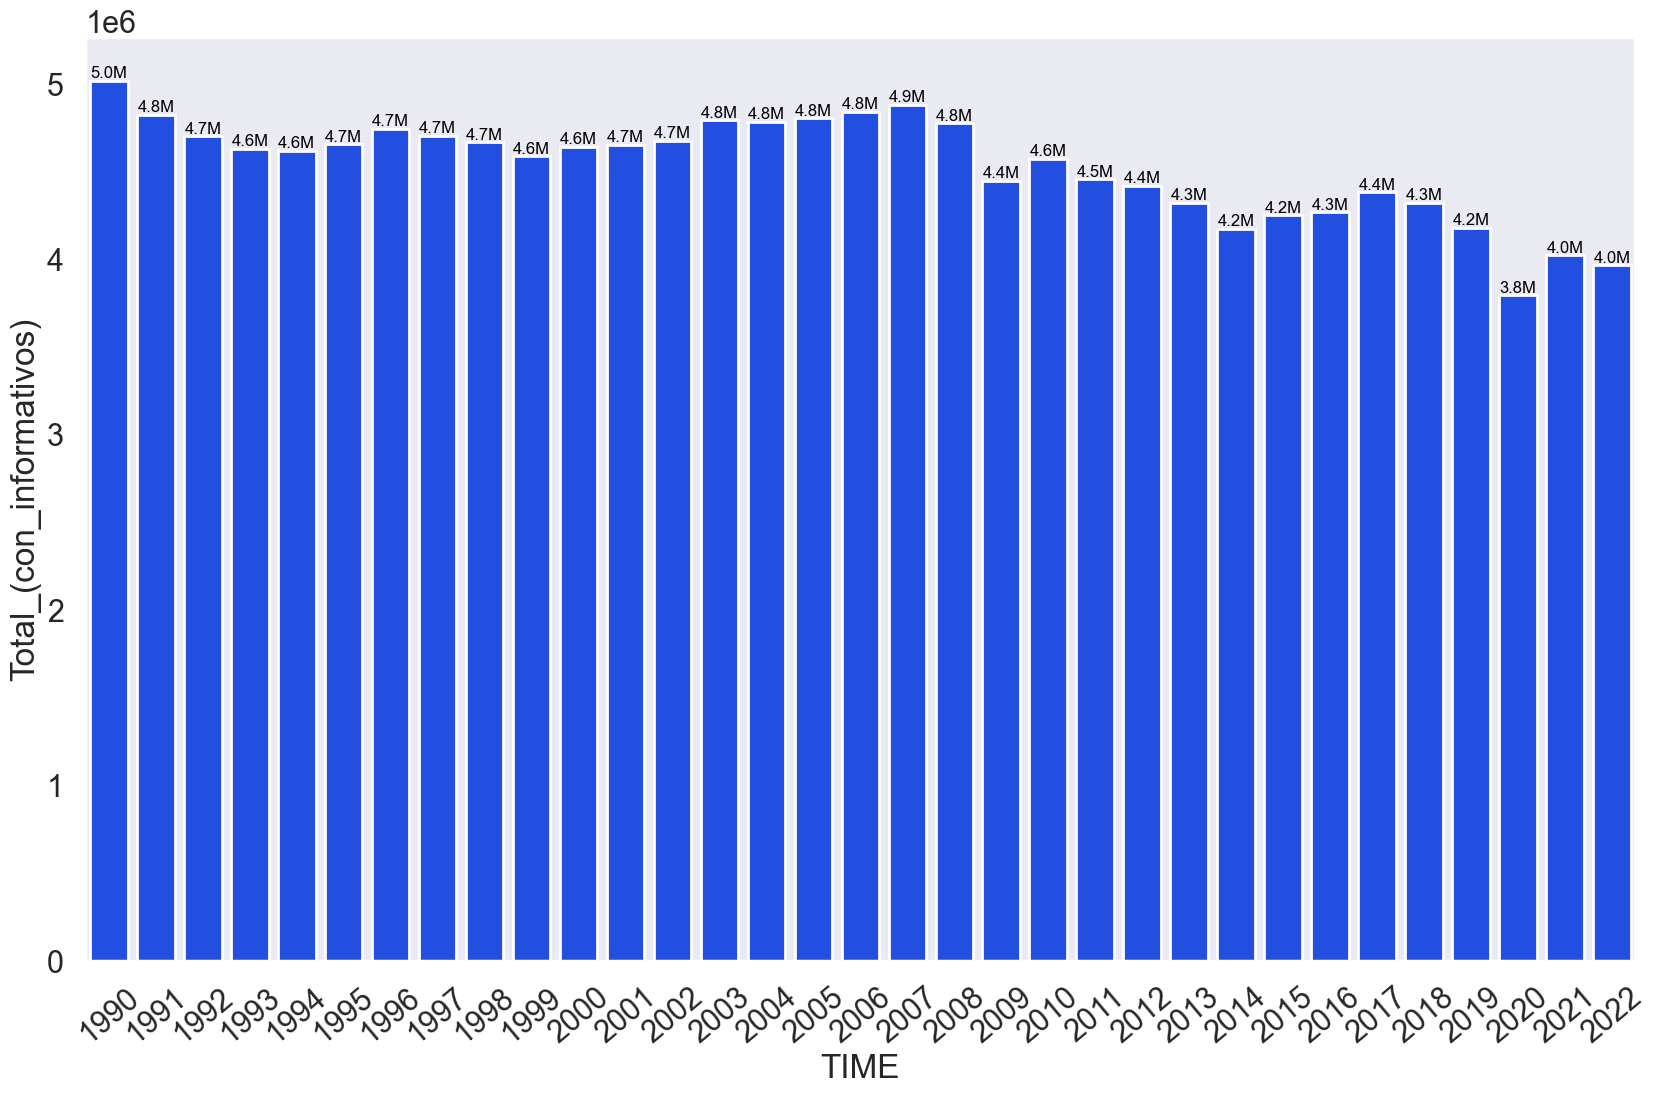

In [24]:
def format_label(value):
    if value >= 1e6:
        return f'{value / 1e6:.1f}M'
    elif value >= 1e3:
        return f'{value / 1e3:.1f}K'
    else:
        return str(value)
    
plt.figure(figsize=(20,12))
ax = sns.barplot(data=df_greenhouse_gases, y='Total_(con_informativos)',  x='TIME')

for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2,
        height,
        format_label(height),
        ha='center',
        va='bottom',
        fontsize=12,
        color='black'
    )

plt.xticks(rotation=40)
plt.grid(False)
plt.show()

Idea, empezar con 3 como base  para ver la variación de una manera más notable.

La contaminación se ha bajado en un tanto porciento.

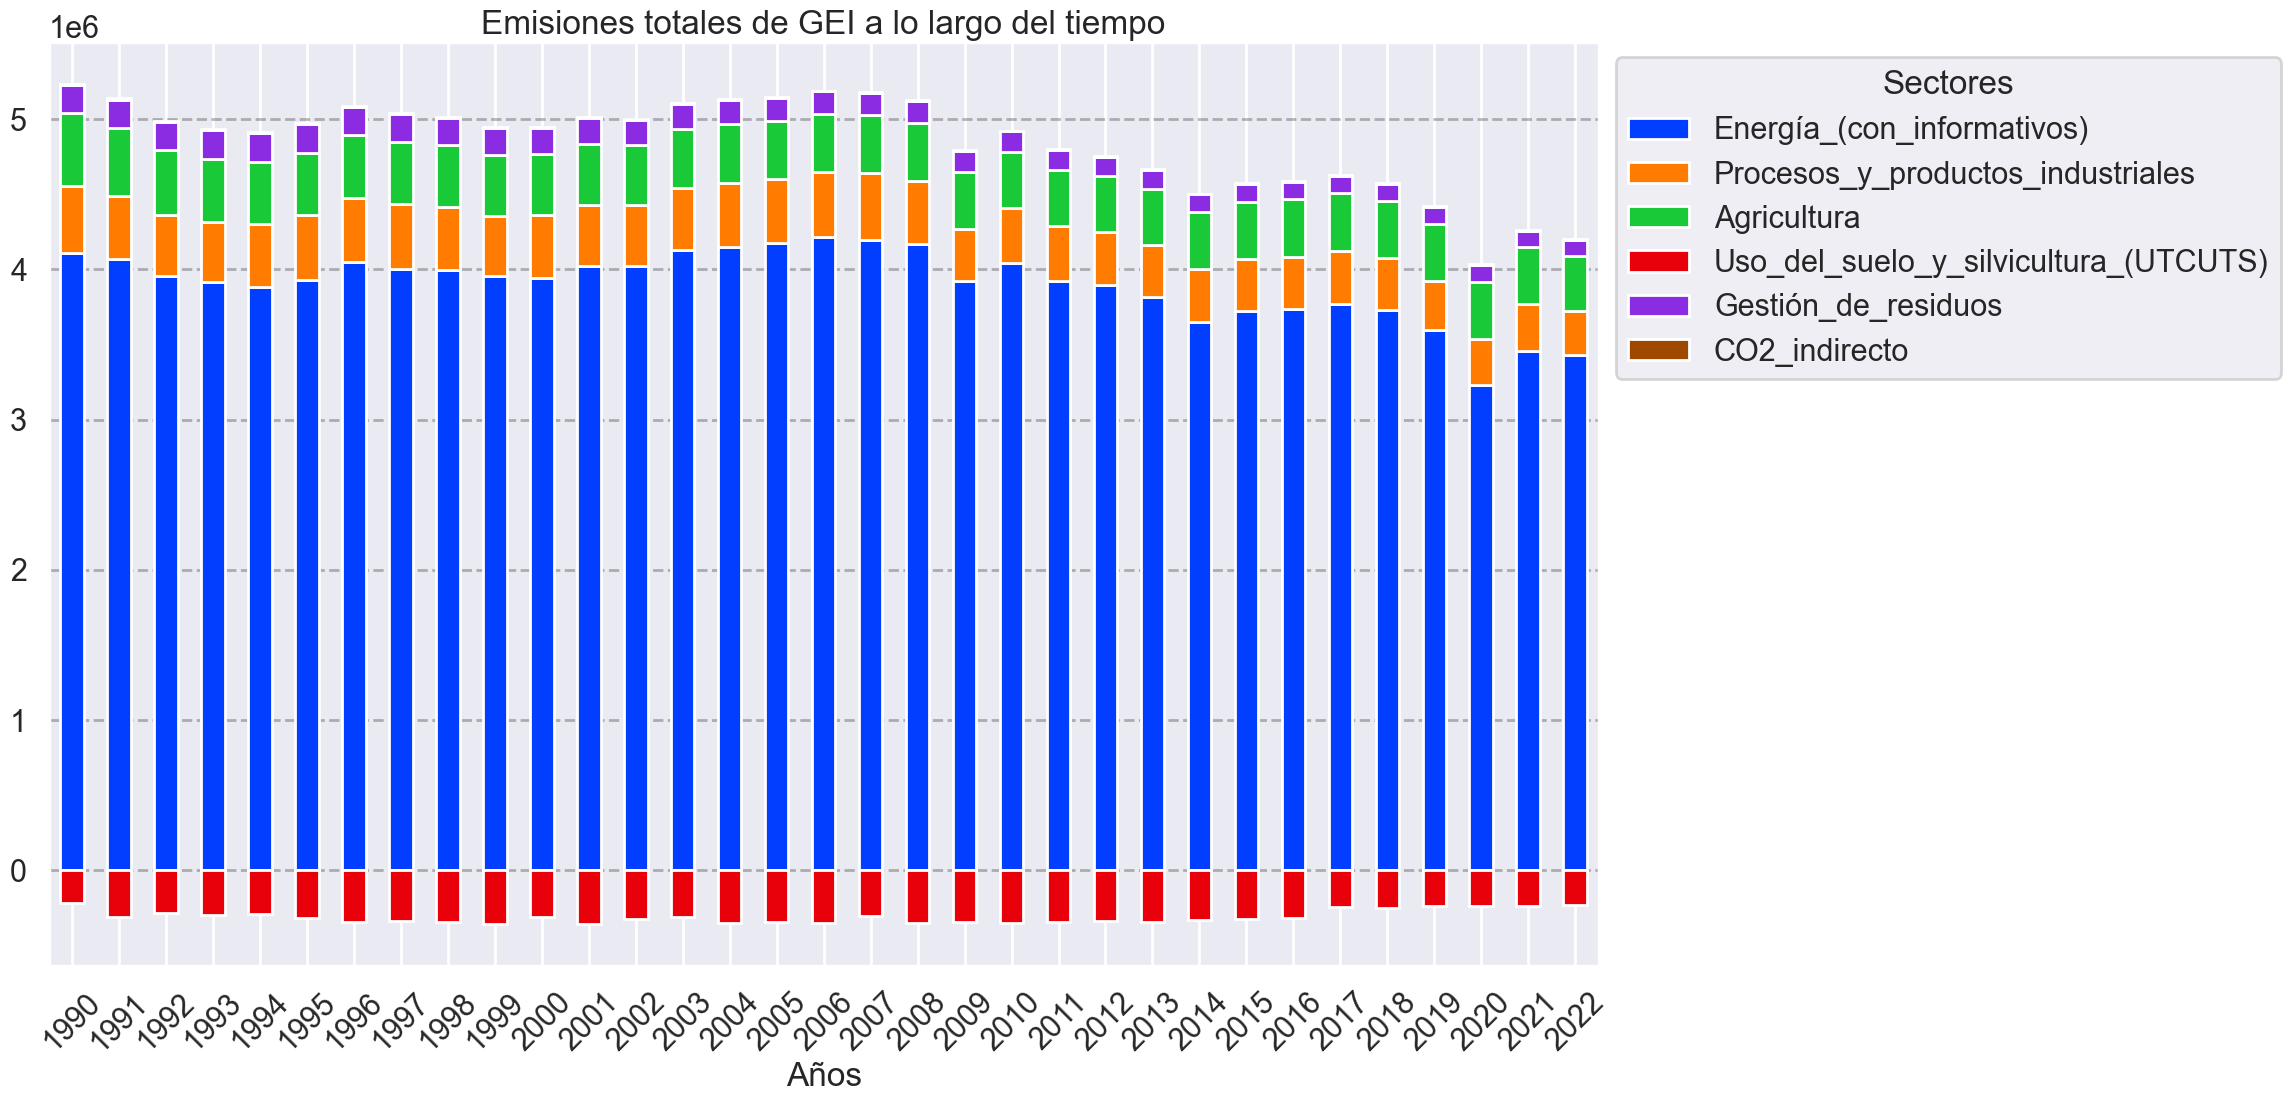

In [26]:
df_greenhouse_gases_by_sectors = df_greenhouse_gases[['TIME','Energía_(con_informativos)', 'Procesos_y_productos_industriales', 'Agricultura', 
                                                      'Uso_del_suelo_y_silvicultura_(UTCUTS)', 'Gestión_de_residuos', 'CO2_indirecto']]
df_greenhouse_gases_by_sectors = df_greenhouse_gases_by_sectors.set_index('TIME')

df_greenhouse_gases_by_sectors.plot(kind='bar', stacked=True, figsize=(20,12))
plt.legend(title='Sectores', loc='upper right', bbox_to_anchor=(1.45, 1))
plt.title('Emisiones totales de GEI a lo largo del tiempo')
plt.xlabel('Años')
plt.xticks(rotation=45)
plt.grid(color='k', axis='y', linestyle='--', alpha=0.3)
plt.show()

#### 2. Emisiones por Sector

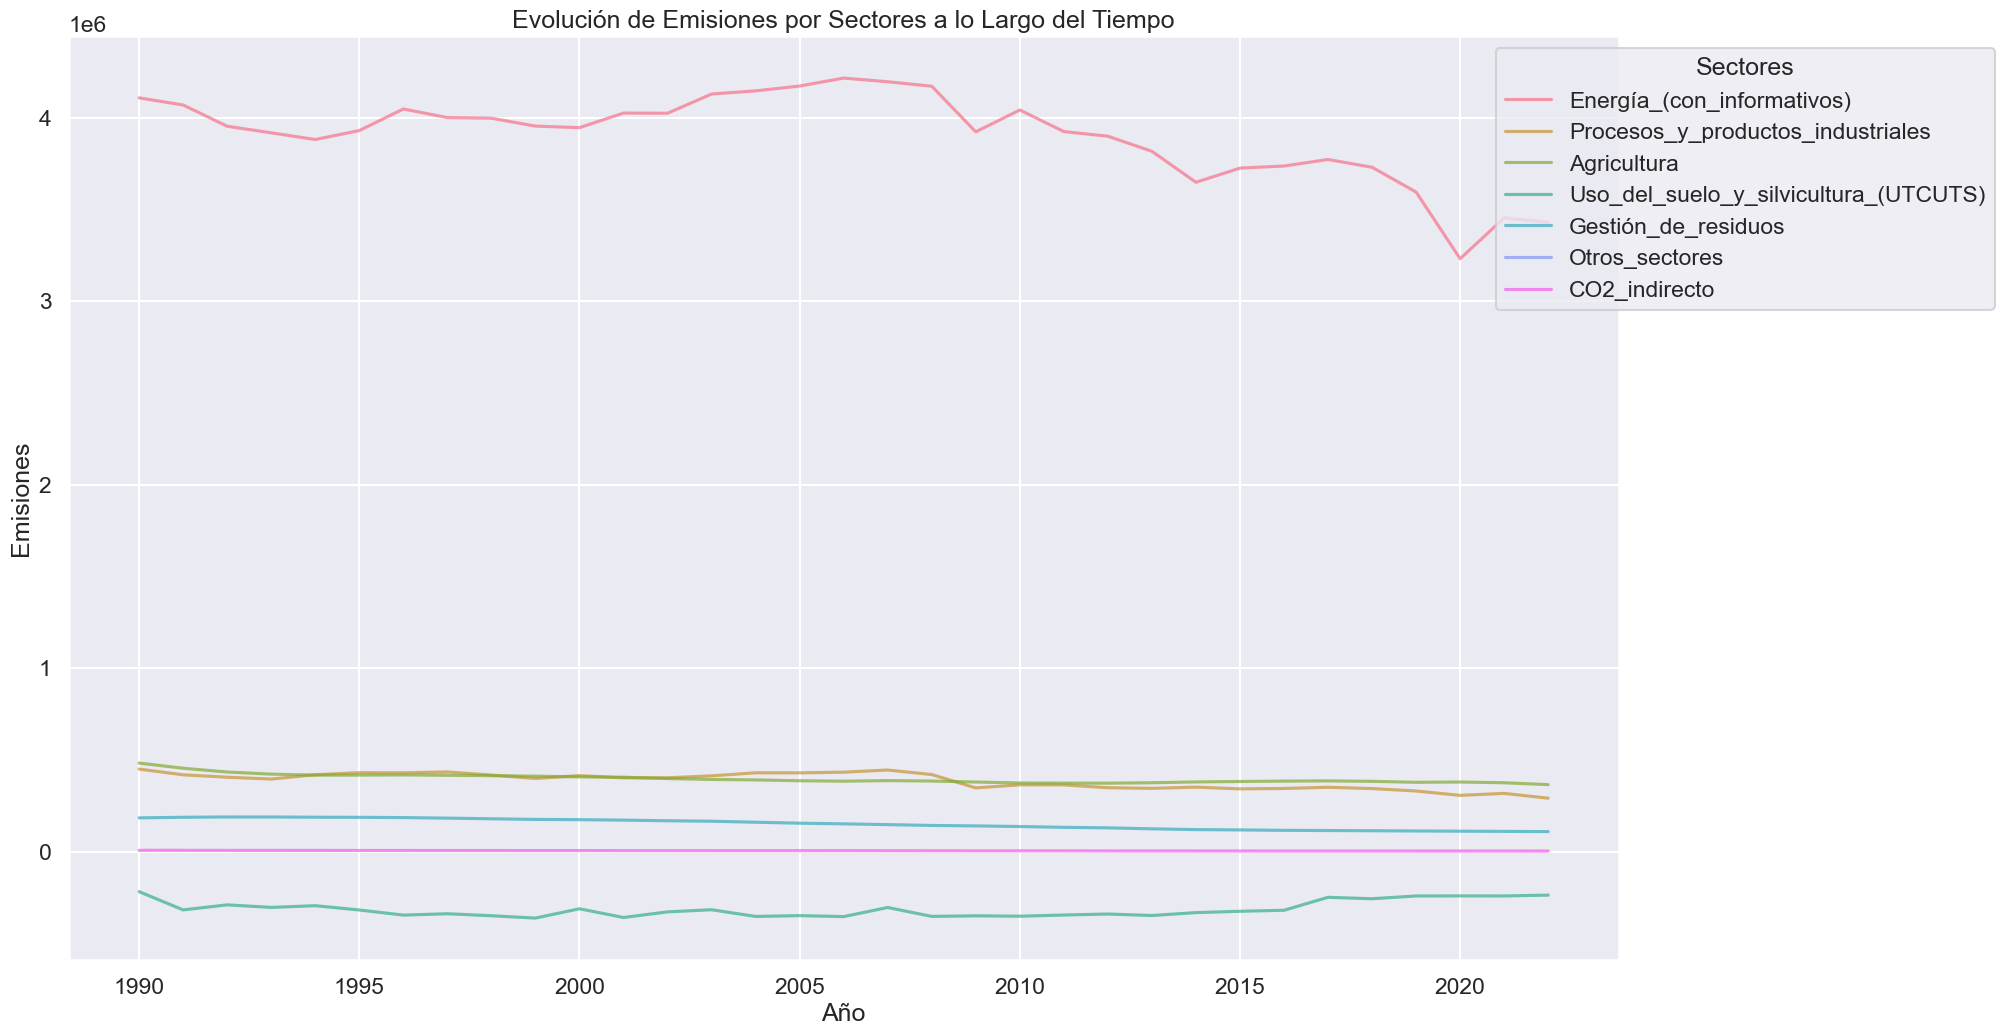

In [ ]:
df_greenhouse_gases = df_greenhouse_gases.reset_index()
id_vars = ['TIME']
value_vars = df_greenhouse_gases.columns[3:]

df_long = df_greenhouse_gases.melt(id_vars=id_vars, value_vars=value_vars, var_name='Sectores', value_name='Emisiones')
sectors_of_interest = ['Energía_(con_informativos)', 'Procesos_y_productos_industriales', 'Agricultura',
                       'Uso_del_suelo_y_silvicultura_(UTCUTS)', 'Gestión_de_residuos', 'Otros_sectores', 'CO2_indirecto']
df_long = df_long[df_long["Sectores"].isin(sectors_of_interest)]

plt.figure(figsize=(20,12))

ax = sns.lineplot(data=df_long, x="TIME", y="Emisiones", hue="Sectores")
plt.legend(title='Sectores',
          loc='upper right', bbox_to_anchor=(1.3, 1))
plt.title("Evolución de Emisiones por Sectores a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.show()

#### 3. Emisiones en el sector Energías

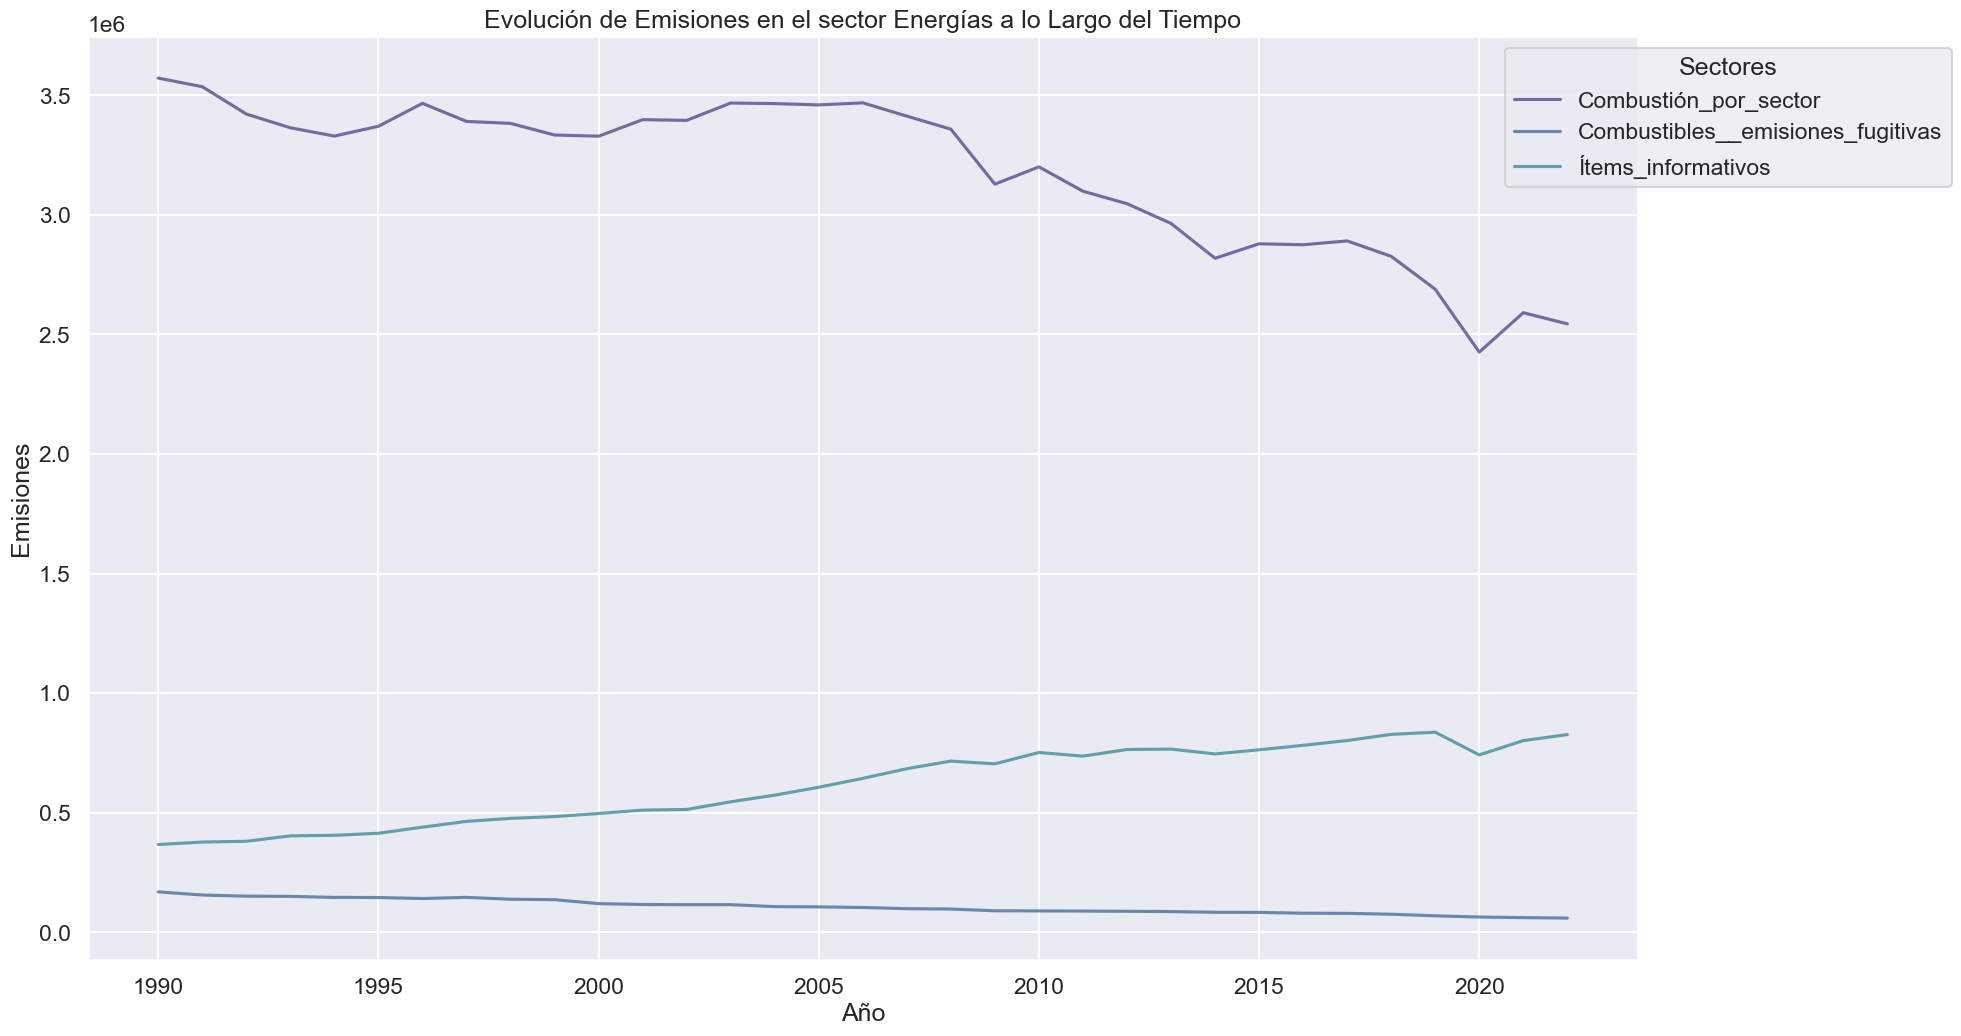

In [ ]:
df_gases_energy = ['TIME','Combustión_por_sector','Combustibles__emisiones_fugitivas','Ítems_informativos']

df_gases_energy = df_greenhouse_gases[df_gases_energy]

id_vars = ["TIME"]
value_vars = df_gases_energy.columns[1:]

df_long = df_gases_energy.melt(id_vars=id_vars, value_vars=value_vars, var_name="Sector", value_name="Emisiones")

plt.figure(figsize=(20,12))
sns.lineplot(data=df_long, x="TIME", y="Emisiones", hue="Sector", alpha=0.7)
plt.title("Evolución de Emisiones en el sector Energías a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.legend(title='Sectores', loc='upper right', bbox_to_anchor=(1.21, 1))
plt.show()

#### 4. Emisiones por el uso de combustibles en el sector Energías

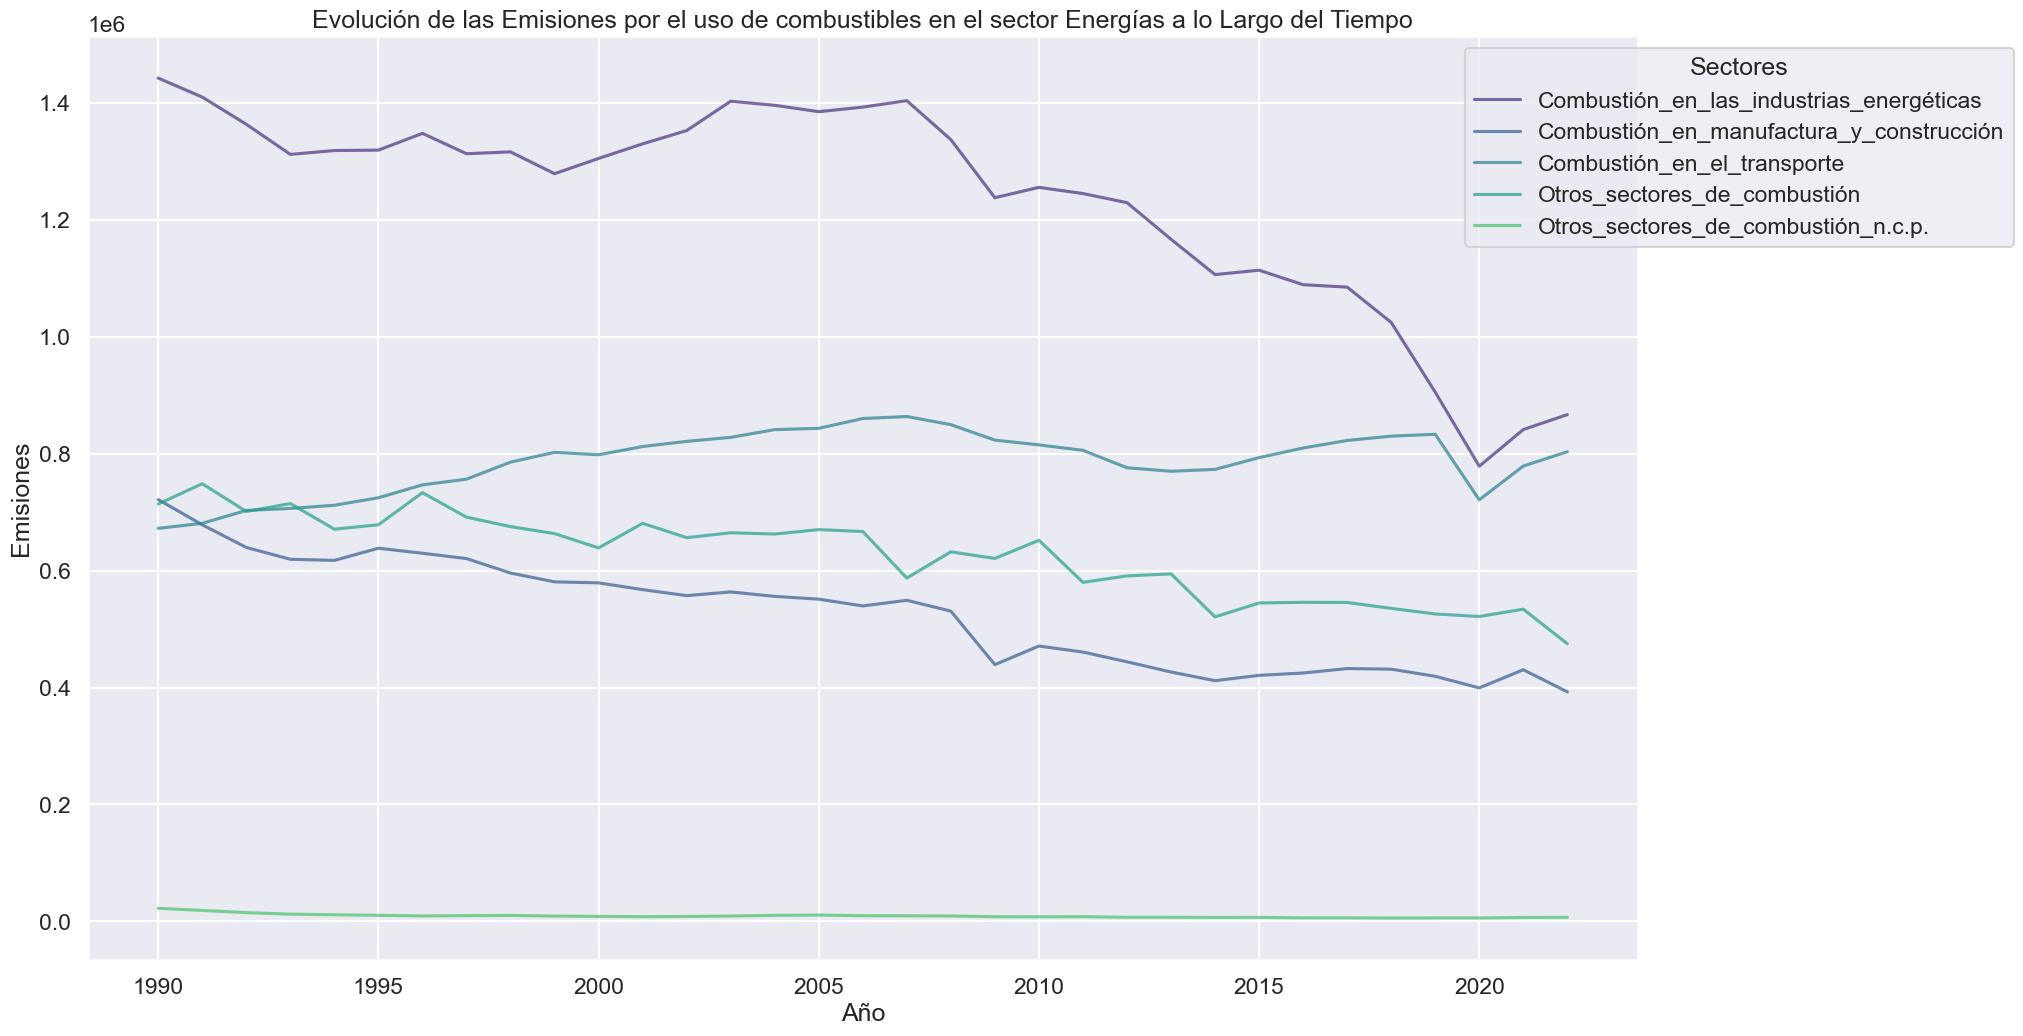

In [ ]:
df_gases_fuels = ['TIME','Combustión_en_las_industrias_energéticas','Combustión_en_manufactura_y_construcción',
                  'Combustión_en_el_transporte','Otros_sectores_de_combustión','Otros_sectores_de_combustión_n.c.p.']

df_gases_fuels = df_greenhouse_gases[df_gases_fuels]

id_vars = ["TIME"]
value_vars = df_gases_fuels.columns[1:]

df_long = df_gases_fuels.melt(id_vars=id_vars, value_vars=value_vars, var_name="Sector", value_name="Emisiones")

plt.figure(figsize=(20,12))
sns.lineplot(data=df_long, x="TIME", y="Emisiones", hue="Sector", alpha=0.7)
plt.title("Evolución de las Emisiones por el uso de combustibles en el sector Energías a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.legend(title='Sectores', loc='upper right', bbox_to_anchor=(1.25, 1)),
plt.show()

#### 5. Emisiones por el uso de combustibles en el transporte

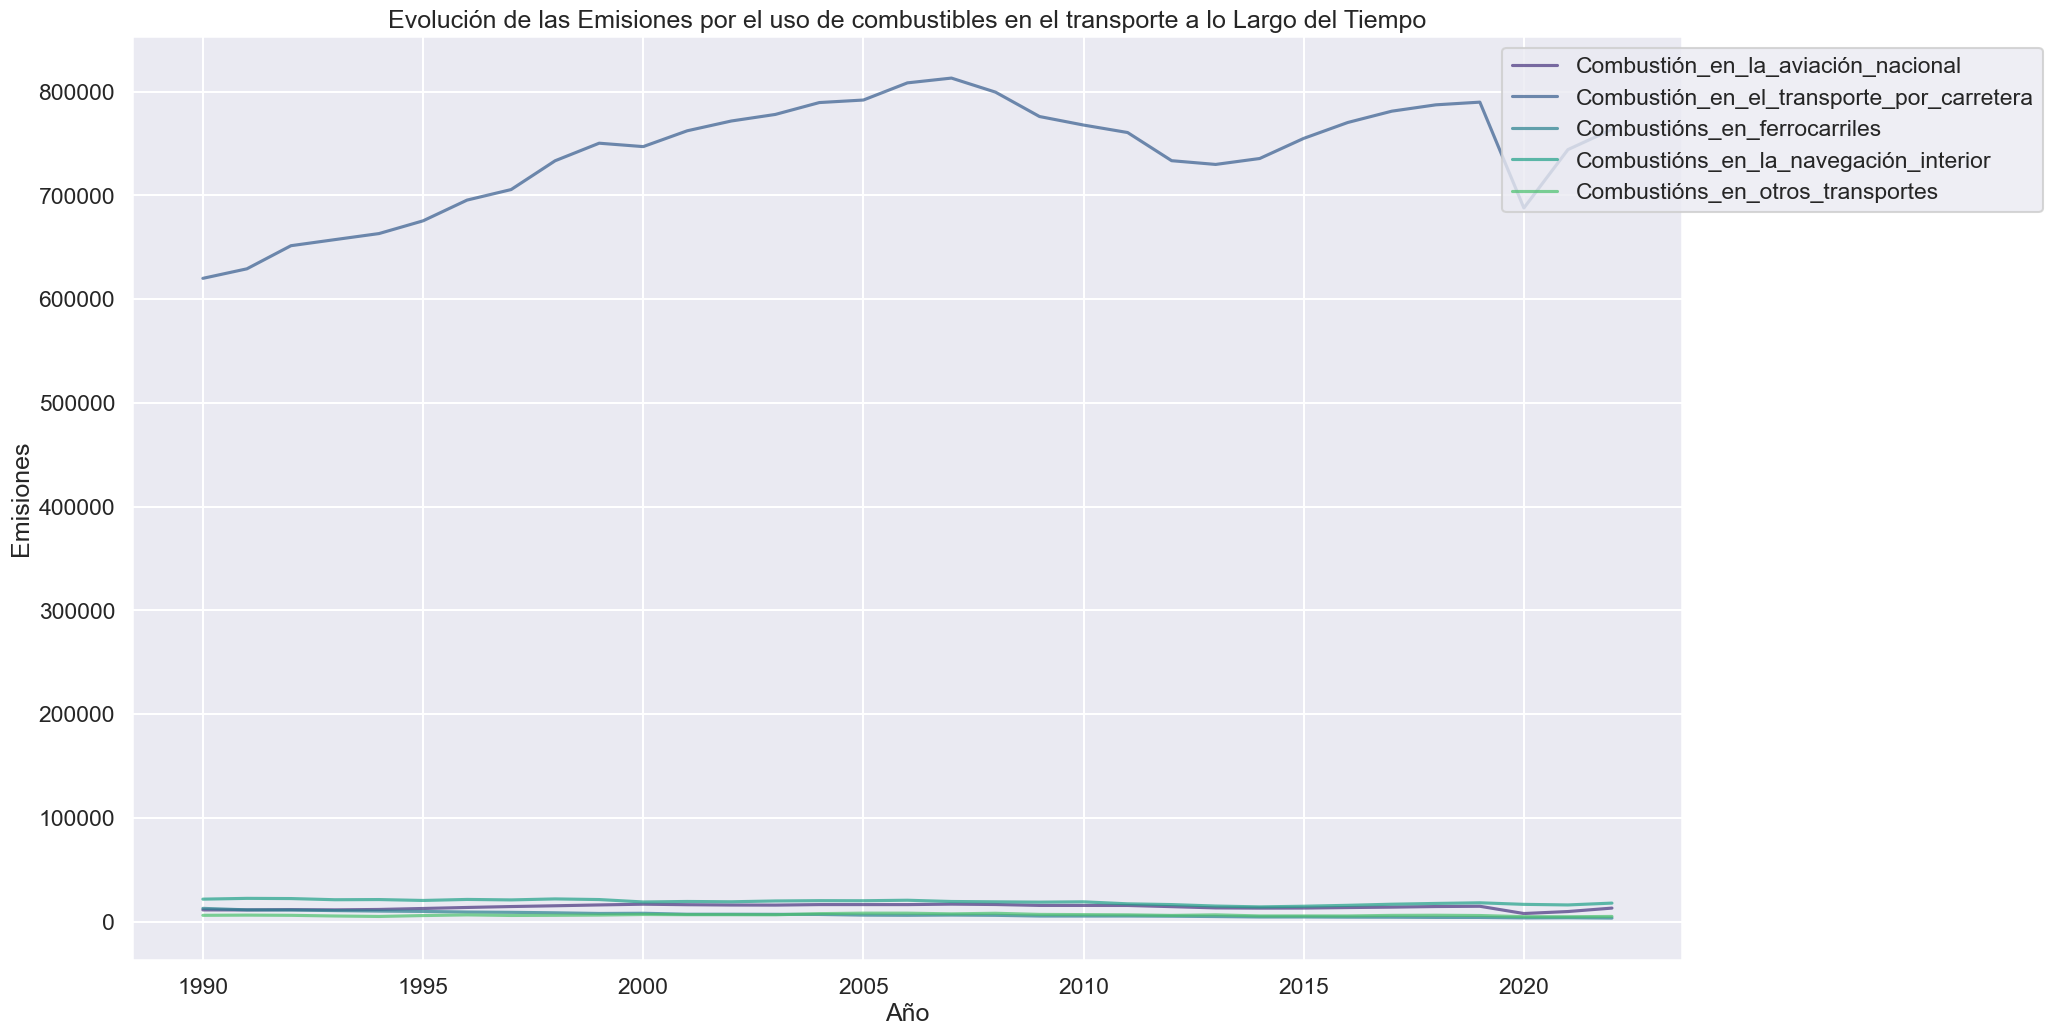

In [ ]:
df_gases_fuel_transport = ['TIME','Combustión_en_la_aviación_nacional','Combustión_en_el_transporte_por_carretera',
                           'Combustións_en_ferrocarriles','Combustións_en_la_navegación_interior','Combustións_en_otros_transportes']
df_gases_fuel_transport = df_greenhouse_gases[df_gases_fuel_transport]

id_vars = ["TIME"]
value_vars = df_gases_fuel_transport.columns[1:]
df_long = df_gases_fuel_transport.melt(id_vars=id_vars, value_vars=value_vars, var_name="Sector", value_name="Emisiones")

plt.figure(figsize=(20,12))
sns.lineplot(data=df_long, x="TIME", y="Emisiones", hue="Sector", alpha=0.7)
plt.title("Evolución de las Emisiones por el uso de combustibles en el transporte a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

#### 6. Emisiones por el uso de combustibles en el transporte terrestre

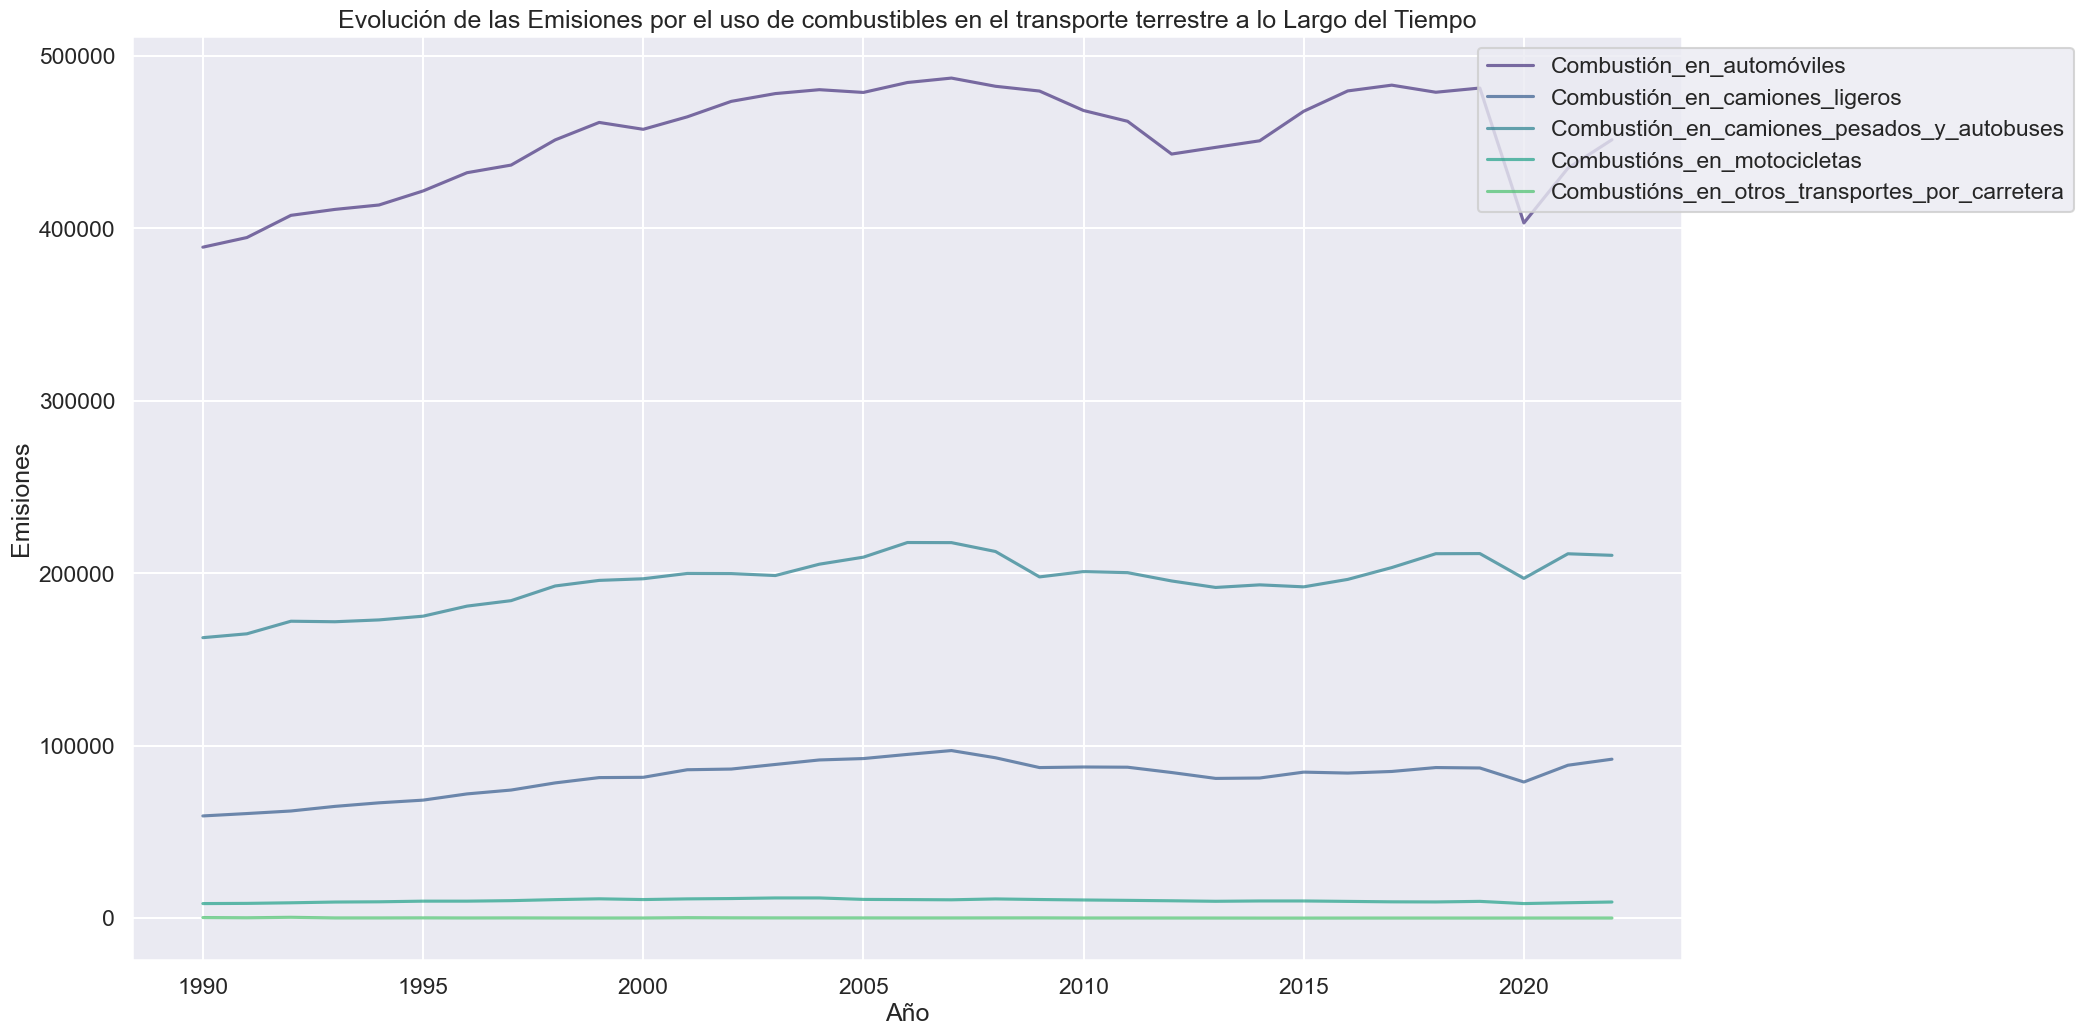

In [ ]:
df_gases_fuel_transport_roads = ['TIME','Combustión_en_automóviles','Combustión_en_camiones_ligeros',
                                 'Combustión_en_camiones_pesados_​​y_autobuses','Combustións_en_motocicletas','Combustións_en_otros_transportes_por_carretera']

df_gases_fuel_transport_roads = df_greenhouse_gases[df_gases_fuel_transport_roads]

id_vars = ["TIME"]
value_vars = df_gases_fuel_transport_roads.columns[1:]
df_long = df_gases_fuel_transport_roads.melt(id_vars=id_vars, value_vars=value_vars, var_name="Sector", value_name="Emisiones")

plt.figure(figsize=(20,12))
sns.lineplot(data=df_long, x="TIME", y="Emisiones", hue="Sector", alpha=0.7)
plt.title("Evolución de las Emisiones por el uso de combustibles en el transporte terrestre a lo Largo del Tiempo")
plt.xlabel("Año")
plt.ylabel("Emisiones")
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

## __Automóviles, por tipo de energía motriz__

Dataset: Passenger cars, by type of motor energy (road_eqs_carpda)    
Fuente institucional de los datos: Eurostat   
Enlace: https://ec.europa.eu/eurostat/databrowser/view/road_eqs_carpda/default/table?lang=en

Frecuencia temporal: Anual  
Unidad de medida: Número

### 🧭 Carga de datos 🧭

En este paso se carga el archivo Excel que contiene los datos de emisiones de gases de efecto invernadero. El archivo debe estar ubicado en la carpeta `Datasets originales`, dentro del directorio principal del proyecto.

In [28]:
file_path = os.path.join(os.getcwd(), "Datasets originales", "road_eqs_carpda__custom_15714409_page_spreadsheet.xlsx")

with open(file_path, "rb") as data:
    cars_park = pd.read_excel(data, sheet_name="Data")
cars_park.head(10)

,GEO (Codes),GEO (Labels),TIME,Total,Liquefied petroleum gases (LPG),Natural gas,Electricity,Alternative energy,Petrol (excluding hybrids),Hybrid electric-petrol,Plug-in hybrid petrol-electric,Diesel (excluding hybrids),Hybrid diesel-electric,Plug-in hybrid diesel-electric,Hydrogen and fuel cells,Bioethanol,Biodiesel,Bi-fuel,Other
0,EU27_2020,European Union - 27 countries (from 2020),2013,221705164.0,NaN,NaN,50278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN
1,EU27_2020,European Union - 27 countries (from 2020),2014,224317337.0,NaN,NaN,76277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN
2,EU27_2020,European Union - 27 countries (from 2020),2015,225651590.0,NaN,NaN,120093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.0,NaN,NaN,NaN,NaN
3,EU27_2020,European Union - 27 countries (from 2020),2016,230249119.0,NaN,NaN,168279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,NaN,NaN,NaN,NaN
4,EU27_2020,European Union - 27 countries (from 2020),2017,236047946.0,NaN,NaN,246099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659.0,NaN,NaN,NaN,NaN
5,EU27_2020,European Union - 27 countries (from 2020),2018,240409941.0,NaN,NaN,357349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,742.0,NaN,NaN,NaN,NaN
6,EU27_2020,European Union - 27 countries (from 2020),2019,244850251.0,NaN,NaN,590393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,NaN,NaN,NaN
7,EU27_2020,European Union - 27 countries (from 2020),2020,247656045.0,NaN,NaN,1093450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1498.0,NaN,NaN,NaN,NaN
8,EU27_2020,European Union - 27 countries (from 2020),2021,250246879.0,NaN,NaN,1940889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2129.0,NaN,NaN,NaN,NaN
9,EU27_2020,European Union - 27 countries (from 2020),2022,252612228.0,NaN,NaN,3015595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3186.0,NaN,NaN,NaN,NaN


In [29]:
# Eliminar a los paises que no son de la Unión Europea presentes en el datarame.
cars_park = cars_park[~cars_park['GEO (Labels)'].isin(['Liechtenstein', 'Norway', 'Switzerland', 'United Kingdom', 'Bosnia and Herzegovina', 'Montenegro',
                                                    'Moldova', 'North Macedonia', 'Georgia', 'Albania', 'Serbia', 'Türkiye', 'Kosovo*'])]

cars_park.columns = cars_park.columns.str.strip().str.replace(' ', '_')

cars_park.head(10)

,GEO_(Codes),GEO_(Labels),TIME,Total,Liquefied_petroleum_gases_(LPG),Natural_gas,Electricity,Alternative_energy,Petrol_(excluding_hybrids),Hybrid_electric-petrol,Plug-in_hybrid_petrol-electric,Diesel_(excluding_hybrids),Hybrid_diesel-electric,Plug-in_hybrid_diesel-electric,Hydrogen_and_fuel_cells,Bioethanol,Biodiesel,Bi-fuel,Other
0,EU27_2020,European Union - 27 countries (from 2020),2013,221705164.0,NaN,NaN,50278.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.0,NaN,NaN,NaN,NaN
1,EU27_2020,European Union - 27 countries (from 2020),2014,224317337.0,NaN,NaN,76277.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN
2,EU27_2020,European Union - 27 countries (from 2020),2015,225651590.0,NaN,NaN,120093.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,222.0,NaN,NaN,NaN,NaN
3,EU27_2020,European Union - 27 countries (from 2020),2016,230249119.0,NaN,NaN,168279.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,322.0,NaN,NaN,NaN,NaN
4,EU27_2020,European Union - 27 countries (from 2020),2017,236047946.0,NaN,NaN,246099.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,659.0,NaN,NaN,NaN,NaN
5,EU27_2020,European Union - 27 countries (from 2020),2018,240409941.0,NaN,NaN,357349.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,742.0,NaN,NaN,NaN,NaN
6,EU27_2020,European Union - 27 countries (from 2020),2019,244850251.0,NaN,NaN,590393.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,NaN,NaN,NaN
7,EU27_2020,European Union - 27 countries (from 2020),2020,247656045.0,NaN,NaN,1093450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1498.0,NaN,NaN,NaN,NaN
8,EU27_2020,European Union - 27 countries (from 2020),2021,250246879.0,NaN,NaN,1940889.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2129.0,NaN,NaN,NaN,NaN
9,EU27_2020,European Union - 27 countries (from 2020),2022,252612228.0,NaN,NaN,3015595.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3186.0,NaN,NaN,NaN,NaN


### Transformaciones a realizar:
Renombrar columnas.    
Agregar datos faltantes a la sumatoria total (los datos faltantes en 'European Union - 27 countries (from 2020)').

In [30]:
df_cars_park = cars_park[~cars_park['GEO_(Labels)'].isin(['European Union - 27 countries (from 2020)'])]

df_cars_park = df_cars_park.groupby('TIME').sum().reset_index()

df_cars_park.insert(2, 'TIME', df_cars_park.pop('TIME'))

df_cars_park['GEO_(Codes)'] = df_cars_park['GEO_(Codes)'].replace('BEBGCZDKDEEEIEELESFRHRITCYLVLTLUHUMTNLATPLPTROSISKFISEIS', 'EU27_2020')
df_cars_park['GEO_(Labels)'] = df_cars_park['GEO_(Labels)'].replace('BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIrelandGreeceSpainFranceCroatiaItalyCyprusLatviaLithuaniaLuxembourgHungaryMaltaNetherlandsAustriaPolandPortugalRomaniaSloveniaSlovakiaFinlandSwedenIceland', 'European Union - 27 countries (from 2020)')

df_cars_park = cars_park.fillna(df_cars_park)

df_cars_park = df_cars_park.iloc[:10]

df_cars_park.head(10)

,GEO_(Codes),GEO_(Labels),TIME,Total,Liquefied_petroleum_gases_(LPG),Natural_gas,Electricity,Alternative_energy,Petrol_(excluding_hybrids),Hybrid_electric-petrol,Plug-in_hybrid_petrol-electric,Diesel_(excluding_hybrids),Hybrid_diesel-electric,Plug-in_hybrid_diesel-electric,Hydrogen_and_fuel_cells,Bioethanol,Biodiesel,Bi-fuel,Other
0,EU27_2020,European Union - 27 countries (from 2020),2013,221705164.0,5704274.0,880229.0,50278.0,7658422.0,67795426.0,171332.0,30874.0,36683521.0,27910.0,1043.0,39.0,29326.0,2.0,317733.0,714507.0
1,EU27_2020,European Union - 27 countries (from 2020),2014,224317337.0,5851232.0,945716.0,76277.0,7782730.0,76912591.0,295448.0,36579.0,71752025.0,41249.0,1975.0,61.0,32771.0,62.0,311138.0,932856.0
2,EU27_2020,European Union - 27 countries (from 2020),2015,225651590.0,3016880.0,1000160.0,120093.0,4912311.0,66433065.0,503658.0,110698.0,68391653.0,75350.0,16843.0,222.0,35734.0,74.0,310903.0,627710.0
3,EU27_2020,European Union - 27 countries (from 2020),2016,230249119.0,3068760.0,1015628.0,168279.0,5322524.0,68636414.0,683205.0,144527.0,71210778.0,81955.0,20996.0,322.0,36890.0,73.0,385367.0,694920.0
4,EU27_2020,European Union - 27 countries (from 2020),2017,236047946.0,3144012.0,1032539.0,246099.0,5286744.0,100676997.0,1148380.0,221503.0,90375941.0,95120.0,24697.0,659.0,37257.0,67.0,374257.0,494892.0
5,EU27_2020,European Union - 27 countries (from 2020),2018,240409941.0,3328033.0,1074777.0,357349.0,5625418.0,106081702.0,1616154.0,297467.0,93818922.0,120635.0,25061.0,742.0,38098.0,198.0,404244.0,471622.0
6,EU27_2020,European Union - 27 countries (from 2020),2019,244850251.0,3485941.0,1115048.0,590393.0,6084796.0,108139562.0,2125577.0,389686.0,94010359.0,232440.0,34500.0,979.0,49251.0,193.0,422227.0,471125.0
7,EU27_2020,European Union - 27 countries (from 2020),2020,247656045.0,3688787.0,1144046.0,1093450.0,6872636.0,108405255.0,2969572.0,757853.0,93592889.0,447978.0,63772.0,1498.0,57394.0,210.0,452196.0,491274.0
8,EU27_2020,European Union - 27 countries (from 2020),2021,250246879.0,3797021.0,1155015.0,1940889.0,7972374.0,108011923.0,4475432.0,1425244.0,92399916.0,789763.0,105395.0,2129.0,77297.0,216.0,524471.0,533211.0
9,EU27_2020,European Union - 27 countries (from 2020),2022,252612228.0,3947995.0,1143058.0,3015595.0,9361894.0,110968329.0,6145843.0,2043454.0,93169033.0,1090099.0,131514.0,3186.0,169414.0,186.0,594066.0,580317.0


In [31]:
df_cars_park = df_cars_park.drop(['Total','Alternative_energy'], axis=1)
df_cars_park = df_cars_park.rename(columns={'Petrol_(excluding_hybrids)': 'Gasolina', 'Diesel_(excluding_hybrids)': 'Diesel', 'Other': 'Otros'})

df_cars_park['Gas_Bio_y_Bi'] = df_cars_park[['Liquefied_petroleum_gases_(LPG)', 'Natural_gas', 'Bioethanol', 'Biodiesel','Bi-fuel']].sum(axis=1)
df_cars_park = df_cars_park.drop(['Liquefied_petroleum_gases_(LPG)', 'Natural_gas', 'Bioethanol', 'Biodiesel','Bi-fuel'], axis=1)
df_cars_park.insert(3, 'Gas_Bio_y_Bi', df_cars_park.pop('Gas_Bio_y_Bi'))
df_cars_park

df_cars_park['Eléctricos'] = df_cars_park[['Electricity', 'Hydrogen_and_fuel_cells', 'Hybrid_electric-petrol', 'Hybrid_diesel-electric', 'Plug-in_hybrid_petrol-electric', 'Plug-in_hybrid_diesel-electric']].sum(axis=1)
df_cars_park = df_cars_park.drop(['Electricity', 'Hydrogen_and_fuel_cells', 'Hybrid_electric-petrol', 'Hybrid_diesel-electric', 'Plug-in_hybrid_petrol-electric', 'Plug-in_hybrid_diesel-electric'], axis=1)
df_cars_park.insert(4, 'Eléctricos', df_cars_park.pop('Eléctricos'))

df_cars_park = df_cars_park.drop(labels=['GEO_(Labels)'], axis=1)

df_cars_park.head(10)

,GEO_(Codes),TIME,Gas_Bio_y_Bi,Eléctricos,Gasolina,Diesel,Otros
0,EU27_2020,2013,6931564.0,281476.0,67795426.0,36683521.0,714507.0
1,EU27_2020,2014,7140919.0,451589.0,76912591.0,71752025.0,932856.0
2,EU27_2020,2015,4363751.0,826864.0,66433065.0,68391653.0,627710.0
3,EU27_2020,2016,4506718.0,1099284.0,68636414.0,71210778.0,694920.0
4,EU27_2020,2017,4588132.0,1736458.0,100676997.0,90375941.0,494892.0
5,EU27_2020,2018,4845350.0,2417408.0,106081702.0,93818922.0,471622.0
6,EU27_2020,2019,5072660.0,3373575.0,108139562.0,94010359.0,471125.0
7,EU27_2020,2020,5342633.0,5334123.0,108405255.0,93592889.0,491274.0
8,EU27_2020,2021,5554020.0,8738852.0,108011923.0,92399916.0,533211.0
9,EU27_2020,2022,5854719.0,12429691.0,110968329.0,93169033.0,580317.0


### 💾 Exportación del dataset limpio 💾

El DataFrame transformado se guarda como archivo `.csv` en la carpeta `Datasets resultantes`. Esto permite reutilizar los datos ya procesados sin volver a ejecutar todos los pasos anteriores.

In [32]:
# Crear la ruta de exportación
output_dir = os.path.join(os.getcwd(), "Datasets resultantes")
os.makedirs(output_dir, exist_ok=True)  # Para crear la carpeta si no existe

# Ruta final del archivo
output_path = os.path.join(output_dir, "df_cars_park.csv")

# Guardar el archivo
df_greenhouse_gases.to_csv(output_path, index=False, encoding='utf-8')

### Visualizaciones exploratorias.

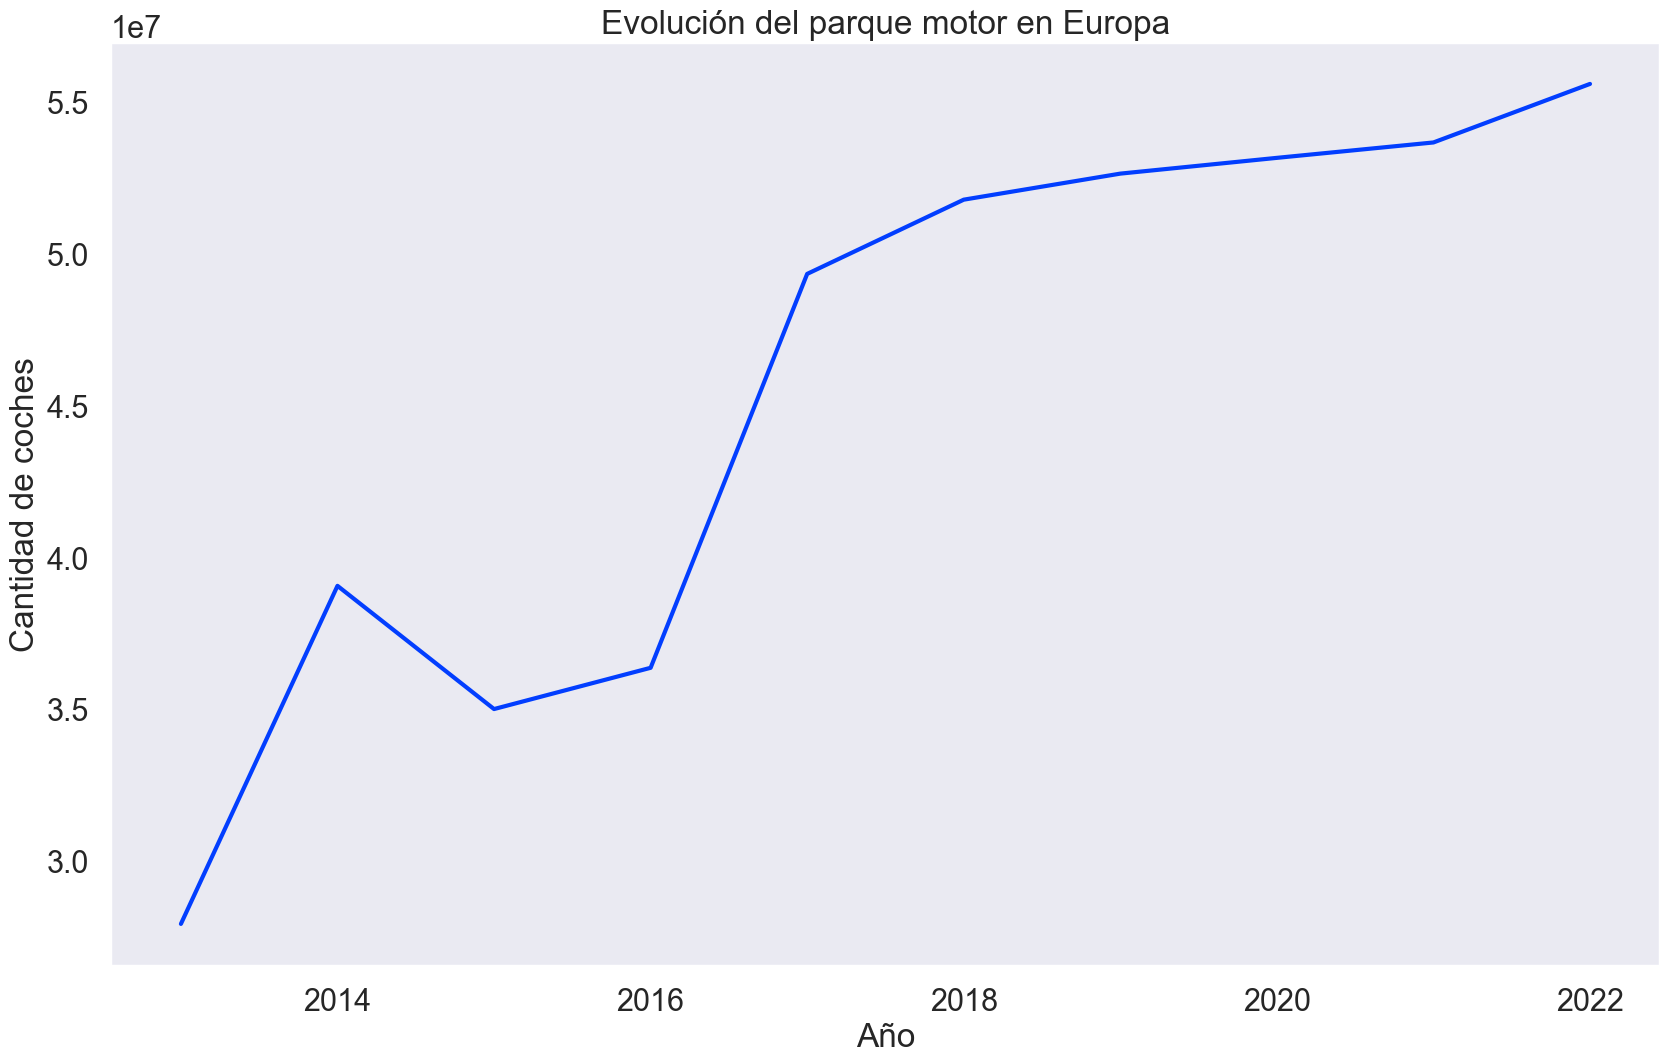

In [34]:
id_vars = 'TIME'
value_vars = ['Gas_Bio_y_Bi', 'Eléctricos', 'Gasolina', 'Diesel']

df_long = df_cars_park.melt(id_vars=id_vars, value_vars=value_vars, var_name='Motor', value_name='Cantidad de coches')

plt.figure(figsize=(20,12))
sns.lineplot(data=df_long, x='TIME', y='Cantidad de coches', errorbar=None)
plt.title('Evolución del parque motor en Europa')
plt.xlabel('Año')
plt.ylabel('Cantidad de coches')
plt.grid(False)
plt.show()

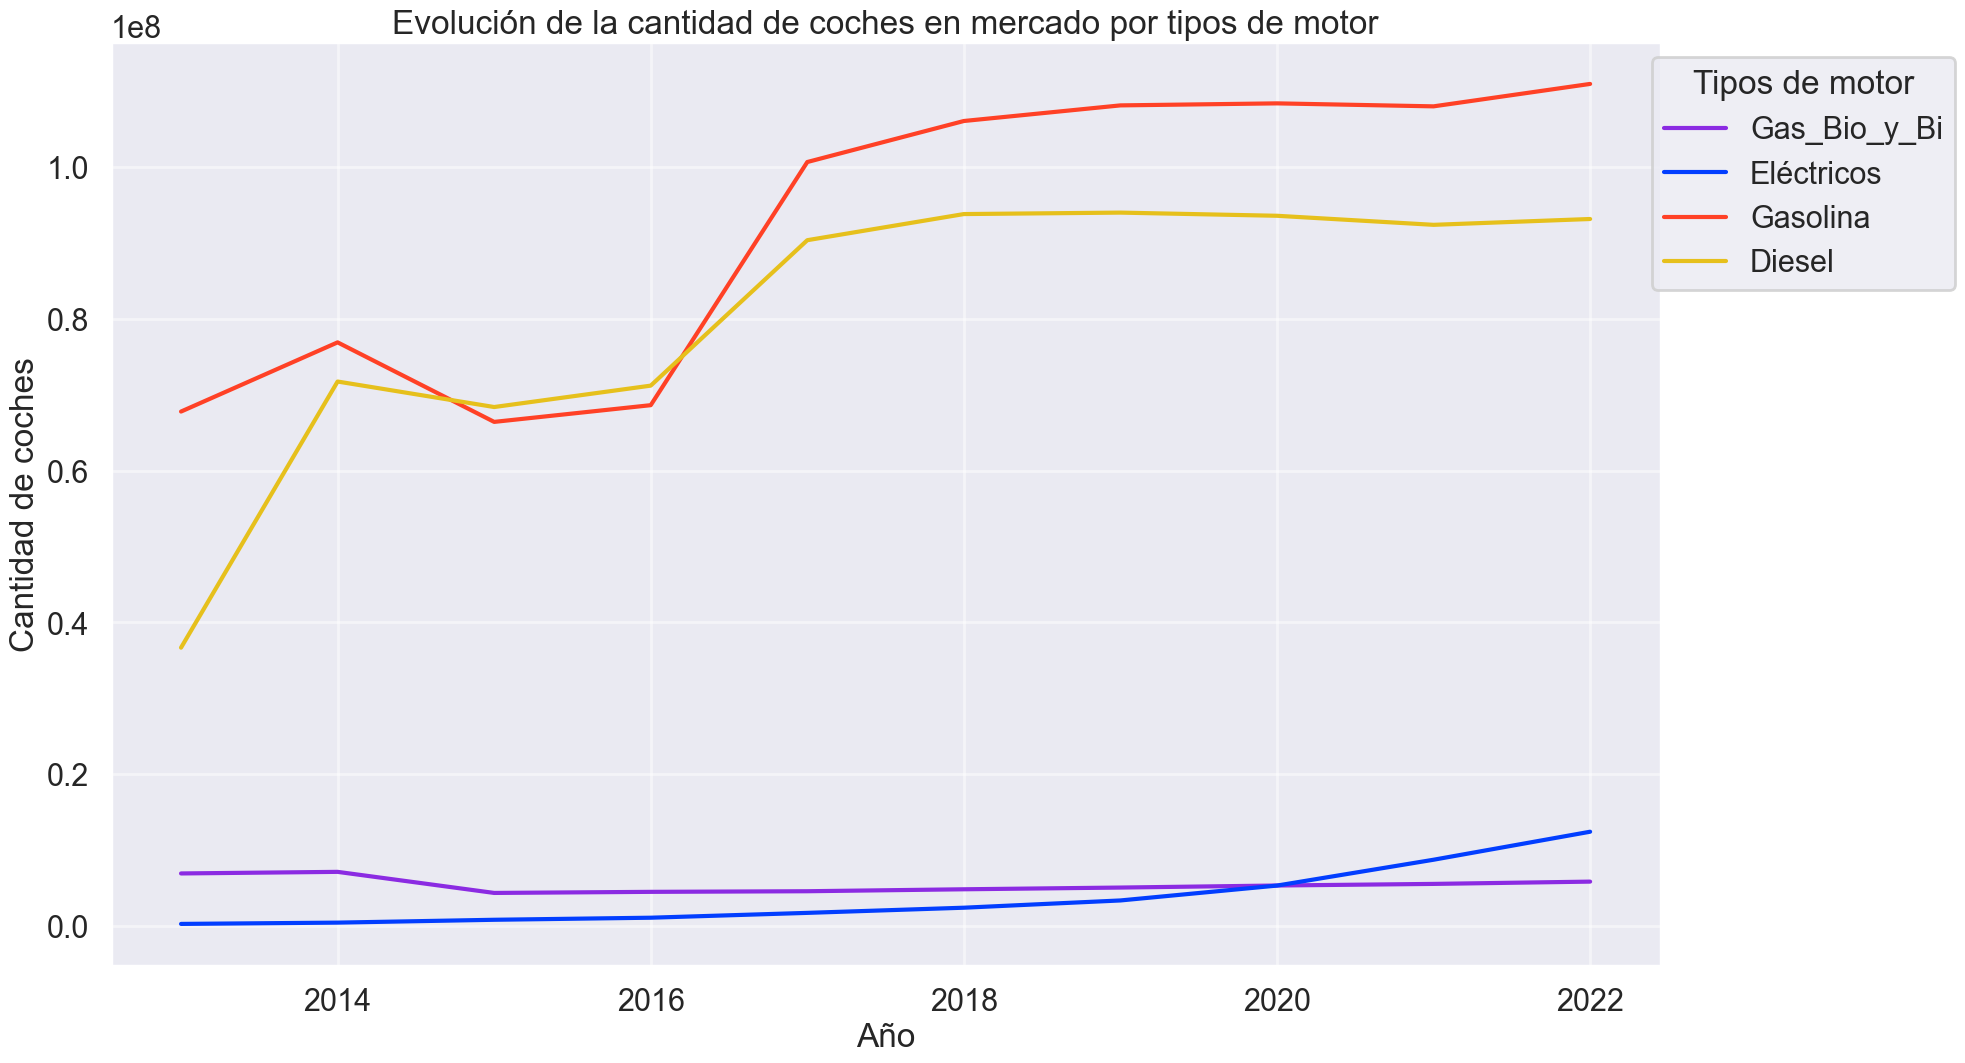

In [35]:
id_vars = 'TIME'
value_vars = ['Gas_Bio_y_Bi', 'Eléctricos', 'Gasolina', 'Diesel']
custom_palette = {'Gas_Bio_y_Bi': '#8b2be2', 'Eléctricos': '#023eff', 'Gasolina': '#ff4126', 'Diesel': '#e6c01c'}

df_long = df_cars_park.melt(id_vars=id_vars, value_vars=value_vars, var_name='Motor', value_name='Cantidad de coches')

plt.figure(figsize=(20,12))
sns.lineplot(data=df_long, x='TIME', y='Cantidad de coches', hue='Motor', palette=custom_palette)
plt.legend(title='Tipos de motor', loc='upper right', bbox_to_anchor=(1.2, 1))
plt.title('Evolución de la cantidad de coches en mercado por tipos de motor')
plt.xlabel('Año')
plt.ylabel('Cantidad de coches')
plt.grid(alpha=0.5)
plt.show()

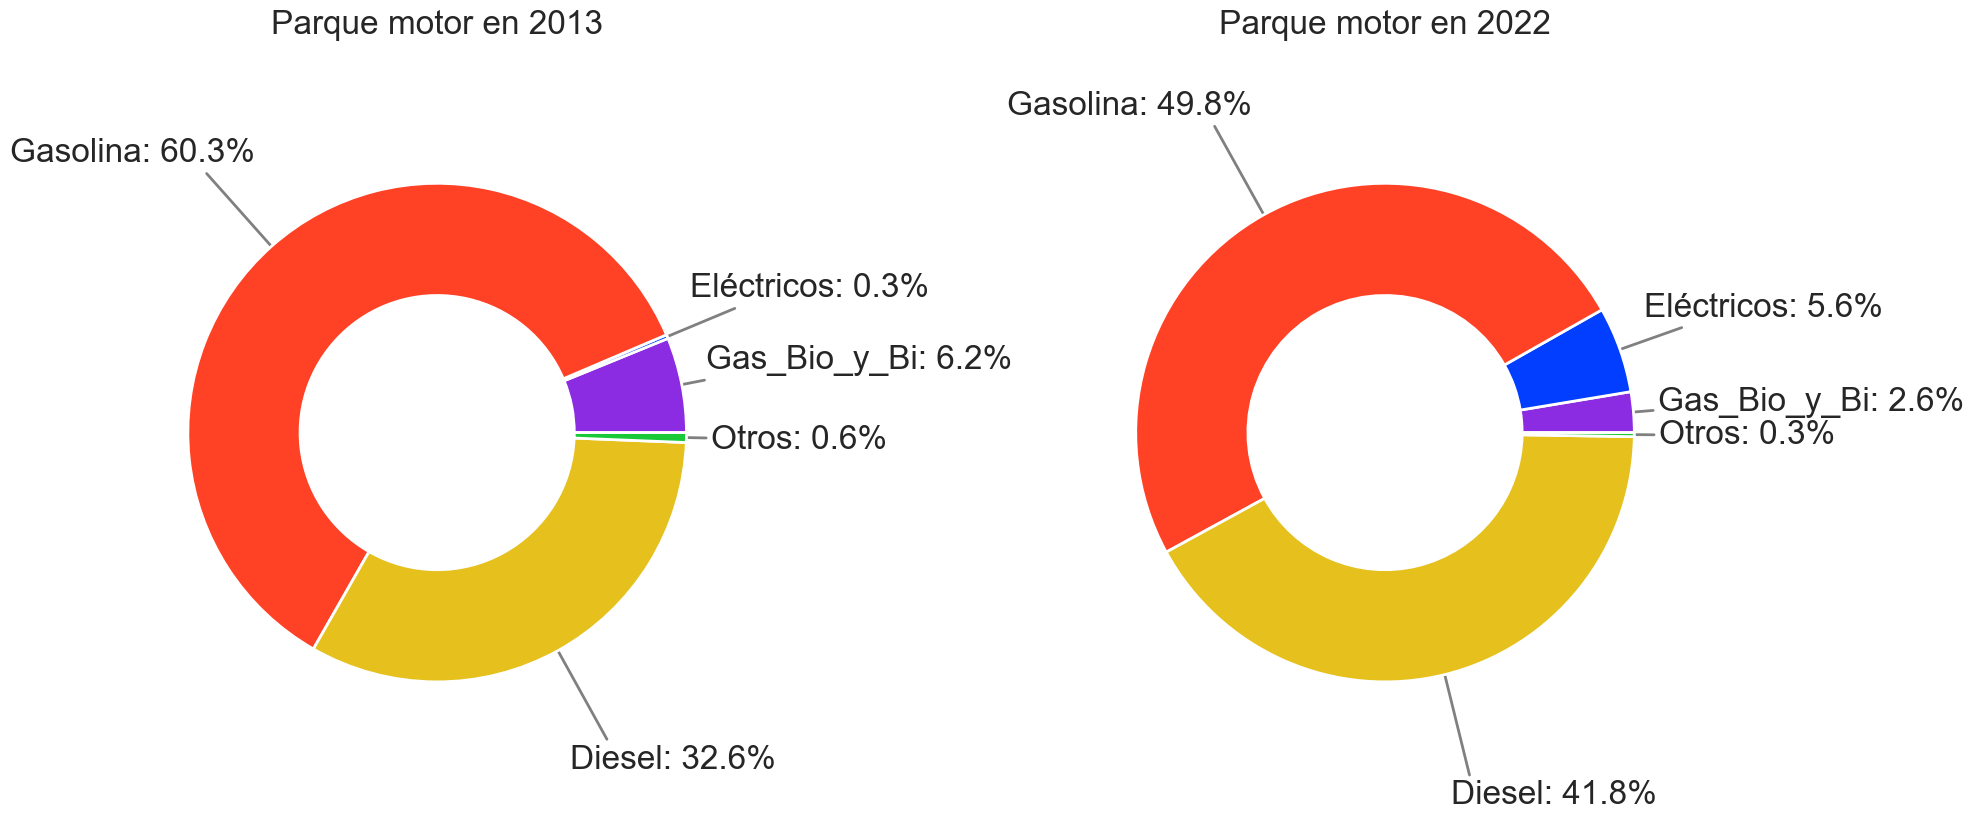

In [39]:
df_2013 = df_cars_park[df_cars_park['TIME'] == 2013]
df_2022 = df_cars_park[df_cars_park['TIME'] == 2022]
columns = ['Gas_Bio_y_Bi', 'Eléctricos', 'Gasolina', 'Diesel', 'Otros']

data_2013 = df_2013[columns].sum()
data_2022 = df_2022[columns].sum()

colors_dict = {'Gas_Bio_y_Bi': '#8b2be2', 'Eléctricos': '#023eff',
               'Gasolina': '#ff4126', 'Diesel': '#e6c01c', 'Otros': '#1ac938'}

def plot_donut(ax, data, title):
    labels = data.index
    values = data.values
    total = sum(values)
    percentages = [v / total * 100 for v in values]
    colors = [colors_dict[l] for l in labels]

    wedges, _ = ax.pie(values, wedgeprops=dict(width=0.45), colors=colors)

    kw = dict(
        arrowprops=dict(arrowstyle="-", shrinkA=1, shrinkB=0, lw=2, color="gray"),
        zorder=0, va="center")

    for i, p in enumerate(wedges):
        ang = (p.theta2 - p.theta1) / 2. + p.theta1
        y = np.sin(np.deg2rad(ang))
        x = np.cos(np.deg2rad(ang))
        horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
        connectionstyle = f"angle,angleA=0,angleB={ang}"
        kw["arrowprops"].update({"connectionstyle": connectionstyle})
        label = f"{labels[i]}: {percentages[i]:.1f}%"
        ax.annotate(label, xy=(x, y), xytext=(1.1*x, 1.5*y),
                    horizontalalignment=horizontalalignment, **kw)

    ax.set_title(title)
    ax.axis('equal')

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
plot_donut(axs[0], data_2013, "Parque motor en 2013")
plot_donut(axs[1], data_2022, "Parque motor en 2022")
plt.tight_layout()
plt.show()

## __Nuevos automóviles, por tipo de energía motriz__

Dataset: New passenger cars by type of motor energy (road_eqr_carpda)    
Fuente institucional de los datos: Eurostat   
Enlace: https://ec.europa.eu/eurostat/databrowser/view/road_eqr_carpda/default/table?lang=en

Frecuencia temporal: Anual  
Unidad de medida: Número    

### 🧭 Carga de datos 🧭

En este paso se carga el archivo Excel que contiene los datos de emisiones de gases de efecto invernadero. El archivo debe estar ubicado en la carpeta `Datasets originales`, dentro del directorio principal del proyecto.

In [40]:
file_path = os.path.join(os.getcwd(), "Datasets originales", "road_eqr_carpda__custom_15714427_page_spreadsheet.xlsx")

with open(file_path, "rb") as data:
    new_cars = pd.read_excel(data, sheet_name="Data")
new_cars.head(10)

,GEO (Codes),GEO (Labels),TIME,Liquefied petroleum gases (LPG),Natural gas,Electricity,Alternative energy,Petrol (excluding hybrids),Hybrid electric-petrol,Plug-in hybrid petrol-electric,Diesel (excluding hybrids),Hybrid diesel-electric,Plug-in hybrid diesel-electric,Hydrogen and fuel cells,Bioethanol,Biodiesel,Bi-fuel,Other
0,EU27_2020,European Union - 27 countries (from 2020),2013,NaN,NaN,21908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
1,EU27_2020,European Union - 27 countries (from 2020),2014,NaN,NaN,30892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN
2,EU27_2020,European Union - 27 countries (from 2020),2015,NaN,NaN,46641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN
3,EU27_2020,European Union - 27 countries (from 2020),2016,NaN,NaN,53544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN
4,EU27_2020,European Union - 27 countries (from 2020),2017,NaN,NaN,83778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.0,NaN,NaN,NaN,NaN
5,EU27_2020,European Union - 27 countries (from 2020),2018,NaN,NaN,134506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN
6,EU27_2020,European Union - 27 countries (from 2020),2019,NaN,NaN,250082.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0,NaN,NaN,NaN,NaN
7,EU27_2020,European Union - 27 countries (from 2020),2020,NaN,NaN,539028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,NaN,NaN,NaN
8,EU27_2020,European Union - 27 countries (from 2020),2021,NaN,NaN,885298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866.0,NaN,NaN,NaN,NaN
9,EU27_2020,European Union - 27 countries (from 2020),2022,NaN,NaN,1129786.0,1399095.0,3373144.0,1849058.0,NaN,1537136.0,NaN,NaN,1206.0,NaN,NaN,NaN,NaN


In [41]:
# Eliminar a los paises que no son de la Unión Europea presentes en el datarame.
new_cars = new_cars[~new_cars['GEO (Labels)'].isin(['Liechtenstein', 'Norway', 'Switzerland', 'United Kingdom', 'Bosnia and Herzegovina', 'Montenegro',
                                                    'Moldova', 'North Macedonia', 'Georgia', 'Albania', 'Serbia', 'Türkiye', 'Kosovo*', 'Ukraine'])]

new_cars.columns = new_cars.columns.str.strip().str.replace(' ', '_')

new_cars.head(10)

,GEO_(Codes),GEO_(Labels),TIME,Liquefied_petroleum_gases_(LPG),Natural_gas,Electricity,Alternative_energy,Petrol_(excluding_hybrids),Hybrid_electric-petrol,Plug-in_hybrid_petrol-electric,Diesel_(excluding_hybrids),Hybrid_diesel-electric,Plug-in_hybrid_diesel-electric,Hydrogen_and_fuel_cells,Bioethanol,Biodiesel,Bi-fuel,Other
0,EU27_2020,European Union - 27 countries (from 2020),2013,NaN,NaN,21908.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
1,EU27_2020,European Union - 27 countries (from 2020),2014,NaN,NaN,30892.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN
2,EU27_2020,European Union - 27 countries (from 2020),2015,NaN,NaN,46641.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126.0,NaN,NaN,NaN,NaN
3,EU27_2020,European Union - 27 countries (from 2020),2016,NaN,NaN,53544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.0,NaN,NaN,NaN,NaN
4,EU27_2020,European Union - 27 countries (from 2020),2017,NaN,NaN,83778.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,214.0,NaN,NaN,NaN,NaN
5,EU27_2020,European Union - 27 countries (from 2020),2018,NaN,NaN,134506.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,223.0,NaN,NaN,NaN,NaN
6,EU27_2020,European Union - 27 countries (from 2020),2019,NaN,NaN,250082.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.0,NaN,NaN,NaN,NaN
7,EU27_2020,European Union - 27 countries (from 2020),2020,NaN,NaN,539028.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,751.0,NaN,NaN,NaN,NaN
8,EU27_2020,European Union - 27 countries (from 2020),2021,NaN,NaN,885298.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,866.0,NaN,NaN,NaN,NaN
9,EU27_2020,European Union - 27 countries (from 2020),2022,NaN,NaN,1129786.0,1399095.0,3373144.0,1849058.0,NaN,1537136.0,NaN,NaN,1206.0,NaN,NaN,NaN,NaN


### Transformaciones a realizar:
Agregar datos faltantes a la sumatoria total (los datos faltantes en 'European Union - 27 countries (from 2020)').

In [42]:
# Filtrar solo los países individuales (evitar duplicar Europa si ya está en los datos)
df_new_cars = new_cars[~new_cars['GEO_(Labels)'].isin(['European Union - 27 countries (from 2020)'])]

# Sumar los valores por año para todos los países
df_new_cars = df_new_cars.groupby('TIME').sum().reset_index()

df_new_cars.insert(2, 'TIME', df_new_cars.pop('TIME'))

df_new_cars['GEO_(Codes)'] = df_new_cars['GEO_(Codes)'].replace('BEBGCZDKDEEEIEELESFRHRITCYLVLTLUHUMTNLATPLPTROSISKFISEIS', 'EU27_2020')
df_new_cars['GEO_(Labels)'] = df_new_cars['GEO_(Labels)'].replace('BelgiumBulgariaCzechiaDenmarkGermanyEstoniaIrelandGreeceSpainFranceCroatiaItalyCyprusLatviaLithuaniaLuxembourgHungaryMaltaNetherlandsAustriaPolandPortugalRomaniaSloveniaSlovakiaFinlandSwedenIceland', 'European Union - 27 countries (from 2020)')

df_new_cars = new_cars.fillna(df_new_cars)

df_new_cars = df_new_cars.iloc[:10]

df_new_cars.head(10)

,GEO_(Codes),GEO_(Labels),TIME,Liquefied_petroleum_gases_(LPG),Natural_gas,Electricity,Alternative_energy,Petrol_(excluding_hybrids),Hybrid_electric-petrol,Plug-in_hybrid_petrol-electric,Diesel_(excluding_hybrids),Hybrid_diesel-electric,Plug-in_hybrid_diesel-electric,Hydrogen_and_fuel_cells,Bioethanol,Biodiesel,Bi-fuel,Other
0,EU27_2020,European Union - 27 countries (from 2020),2013,127712.0,79897.0,21908.0,266653.0,1759604.0,90269.0,1274.0,2783435.0,15233.0,861.0,7.0,670.0,2.0,6617.0,30476.0
1,EU27_2020,European Union - 27 countries (from 2020),2014,137463.0,86343.0,30892.0,295899.0,2176478.0,90201.0,5422.0,3477677.0,10645.0,1073.0,21.0,604.0,6.0,8537.0,32428.0
2,EU27_2020,European Union - 27 countries (from 2020),2015,133943.0,70743.0,46641.0,296713.0,2618876.0,128297.0,12554.0,3664274.0,22120.0,863.0,126.0,347.0,1.0,8536.0,38006.0
3,EU27_2020,European Union - 27 countries (from 2020),2016,113317.0,49513.0,53544.0,279173.0,3175756.0,158323.0,19094.0,3882988.0,6174.0,1845.0,104.0,1086.0,0.0,10377.0,53711.0
4,EU27_2020,European Union - 27 countries (from 2020),2017,147922.0,39971.0,83778.0,290078.0,5765771.0,292871.0,64868.0,5435460.0,3911.0,3105.0,214.0,12.0,0.0,15250.0,6652.0
5,EU27_2020,European Union - 27 countries (from 2020),2018,142841.0,52018.0,134506.0,371080.0,6584154.0,388438.0,85220.0,4590472.0,24931.0,2596.0,223.0,28.0,27.0,36818.0,6622.0
6,EU27_2020,European Union - 27 countries (from 2020),2019,158148.0,63787.0,250082.0,507394.0,7265619.0,517252.0,105767.0,4075878.0,111447.0,10909.0,480.0,59.0,21.0,30124.0,7526.0
7,EU27_2020,European Union - 27 countries (from 2020),2020,115548.0,53264.0,539028.0,745007.0,4557309.0,807889.0,408448.0,2761380.0,201908.0,33208.0,751.0,26.0,35.0,38429.0,2088.0
8,EU27_2020,European Union - 27 countries (from 2020),2021,139164.0,43060.0,885298.0,1160662.0,3869164.0,1609253.0,757933.0,1939659.0,404595.0,56313.0,866.0,21.0,0.0,86265.0,4258.0
9,EU27_2020,European Union - 27 countries (from 2020),2022,160251.0,18113.0,1129786.0,1399095.0,3373144.0,1849058.0,772737.0,1537136.0,388708.0,45446.0,1206.0,32.0,2.0,83880.0,5829.0


In [43]:
df_new_cars = df_new_cars.drop(['Alternative_energy'], axis=1)
df_new_cars = df_new_cars.rename(columns={'Petrol_(excluding_hybrids)': 'Gasolina', 'Diesel_(excluding_hybrids)': 'Diesel', 'Other': 'Otros'})

df_new_cars['Gas_Bio_y_Bi'] = df_new_cars[['Liquefied_petroleum_gases_(LPG)', 'Natural_gas', 'Bioethanol', 'Biodiesel','Bi-fuel']].sum(axis=1)
df_new_cars = df_new_cars.drop(['Liquefied_petroleum_gases_(LPG)', 'Natural_gas', 'Bioethanol', 'Biodiesel','Bi-fuel'], axis=1)
df_new_cars.insert(3, 'Gas_Bio_y_Bi', df_new_cars.pop('Gas_Bio_y_Bi'))
df_new_cars

df_new_cars['Eléctricos'] = df_new_cars[['Electricity', 'Hydrogen_and_fuel_cells', 'Hybrid_electric-petrol', 'Hybrid_diesel-electric', 'Plug-in_hybrid_petrol-electric', 'Plug-in_hybrid_diesel-electric']].sum(axis=1)
df_new_cars = df_new_cars.drop(['Electricity', 'Hydrogen_and_fuel_cells', 'Hybrid_electric-petrol', 'Hybrid_diesel-electric', 'Plug-in_hybrid_petrol-electric', 'Plug-in_hybrid_diesel-electric'], axis=1)
df_new_cars.insert(4, 'Eléctricos', df_new_cars.pop('Eléctricos'))

df_new_cars = df_new_cars.drop(labels=['GEO_(Labels)'], axis=1)

df_new_cars.head(10)

,GEO_(Codes),TIME,Gas_Bio_y_Bi,Eléctricos,Gasolina,Diesel,Otros
0,EU27_2020,2013,214898.0,129552.0,1759604.0,2783435.0,30476.0
1,EU27_2020,2014,232953.0,138254.0,2176478.0,3477677.0,32428.0
2,EU27_2020,2015,213570.0,210601.0,2618876.0,3664274.0,38006.0
3,EU27_2020,2016,174293.0,239084.0,3175756.0,3882988.0,53711.0
4,EU27_2020,2017,203155.0,448747.0,5765771.0,5435460.0,6652.0
5,EU27_2020,2018,231732.0,635914.0,6584154.0,4590472.0,6622.0
6,EU27_2020,2019,252139.0,995937.0,7265619.0,4075878.0,7526.0
7,EU27_2020,2020,207302.0,1991232.0,4557309.0,2761380.0,2088.0
8,EU27_2020,2021,268510.0,3714258.0,3869164.0,1939659.0,4258.0
9,EU27_2020,2022,262278.0,4186941.0,3373144.0,1537136.0,5829.0


### 💾 Exportación del dataset limpio 💾

El DataFrame transformado se guarda como archivo `.csv` en la carpeta `Datasets resultantes`. Esto permite reutilizar los datos ya procesados sin volver a ejecutar todos los pasos anteriores.

In [44]:
# Crear la ruta de exportación
output_dir = os.path.join(os.getcwd(), "Datasets resultantes")
os.makedirs(output_dir, exist_ok=True)  # Para crear la carpeta si no existe

# Ruta final del archivo
output_path = os.path.join(output_dir, "df_new_cars.csv")

# Guardar el archivo
df_greenhouse_gases.to_csv(output_path, index=False, encoding='utf-8')

### Visualizaciones exploratorias.

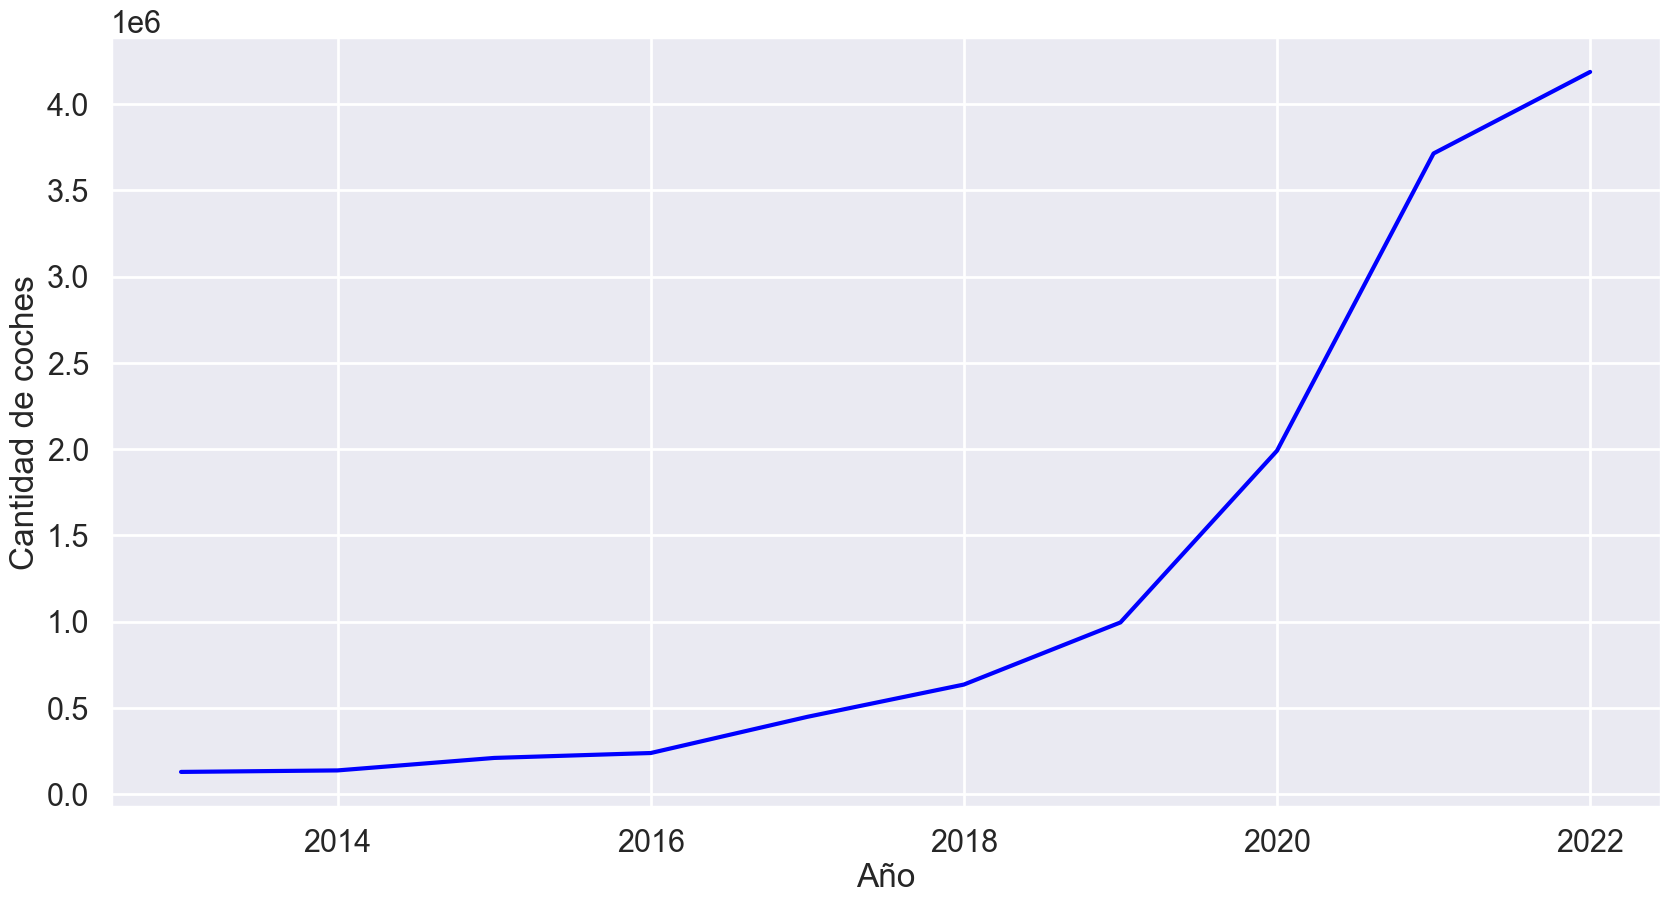

In [20]:
# Seleccionar columnas relevantes (Año y sectores de emisión)
id_vars = ["TIME"]  # Columna de años
value_vars = df_new_cars.columns[2]  # Todas las demás columnas son sectores

# Convertir a formato largo
df_long = df_new_cars.melt(id_vars=id_vars, value_vars=value_vars, var_name="Motor", value_name="Cantidad de coches")

# Configurar el tamaño de la figura
plt.figure(figsize=(20,10))

# Crear gráfico de líneas
sns.lineplot(data=df_long, x="TIME", y="Cantidad de coches", color='blue')  # alpha para mejorar visibilidad

# Etiquetas y título
#plt.title("Evolución de los Nuevos coches registrados por tipo de motor")
plt.xlabel("Año")
#plt.yticks(minor=True)
plt.ylabel("Cantidad de coches")
plt.grid(True)
#plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))  # Mover la leyenda fuera del gráfico si es necesario
plt.show()

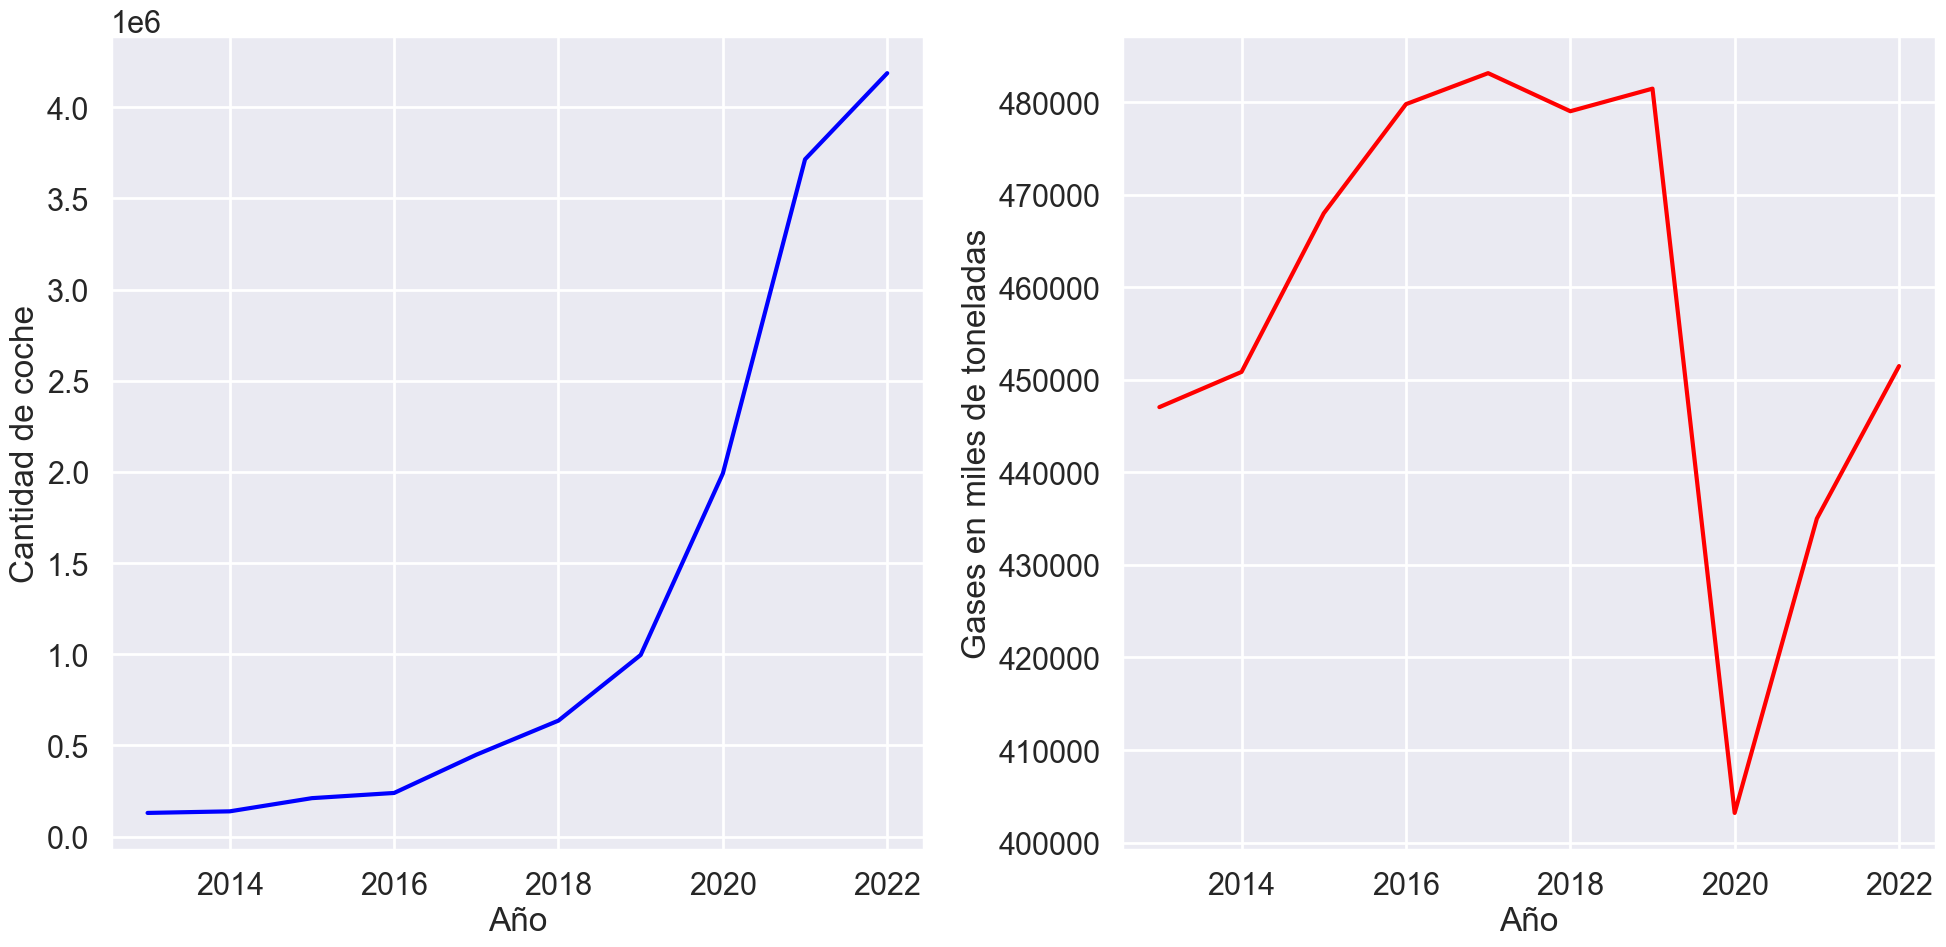

In [ ]:
df_evo_elec_x_trans_ghe = df_greenhouse_gases.merge(df_new_cars, how='inner', on='TIME').reset_index(drop=True).drop(columns='index', axis=1)

# Configurar el tamaño de la figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharex=True)

# Gráfico 1: Evolución de vehículos eléctricos + hidrógeno
sns.lineplot(data=df_evo_elec_x_trans_ghe, x="TIME", y="Eléctricos_más_Hidrógeno", ax=axes[0], color="blue")
#axes[0].set_title("Nuevos Vehículos Eléctricos registrados")
axes[0].set_xlabel("Año")
axes[0].set_ylabel("Cantidad de coche")
axes[0].grid(True)

# Gráfico 2: Evolución de automóviles de combustión
sns.lineplot(data=df_evo_elec_x_trans_ghe, x="TIME", y="Combustión_en_automóviles", ax=axes[1], color="red")
#axes[1].set_title("Emisiones de GEI por el uso de Automóviles")
axes[1].set_xlabel("Año")
axes[1].set_ylabel("Gases en miles de toneladas")
axes[1].grid(True)

# Ajustar diseño
plt.tight_layout()
plt.show()

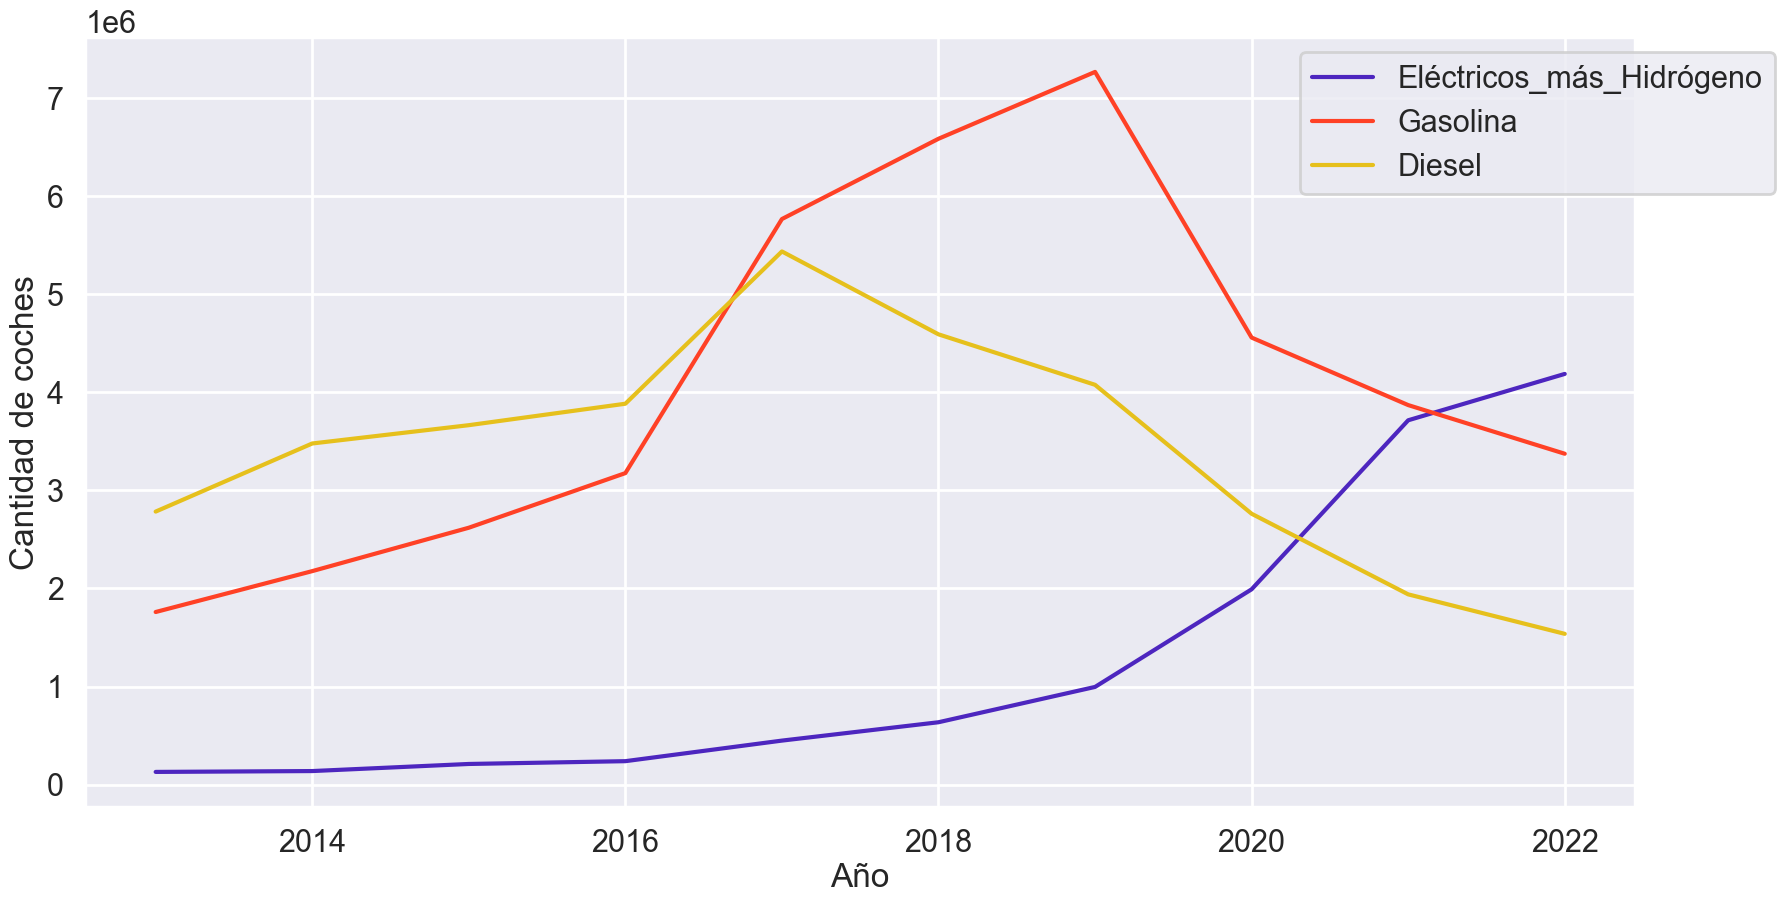

In [ ]:
# Seleccionar columnas relevantes (Año y sectores de emisión)
id_vars = ["TIME"]  # Columna de años
value_vars = df_new_cars.columns[2:5]  # Todas las demás columnas son sectores

# Convertir a formato largo
df_long = df_new_cars.melt(id_vars=id_vars, value_vars=value_vars, var_name="Motor", value_name="Cantidad de coches")

# Configurar el tamaño de la figura
plt.figure(figsize=(20,10))

# Crear gráfico de líneas
sns.lineplot(data=df_long, x="TIME", y="Cantidad de coches", hue="Motor", palette="CMRmap")  # alpha para mejorar visibilidad

# Etiquetas y título
#plt.title("Evolución de los Nuevos coches registrados por tipo de motor")
plt.xlabel("Año")
plt.ylabel("Cantidad de coches")
plt.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1))  # Mover la leyenda fuera del gráfico si es necesario
plt.show()

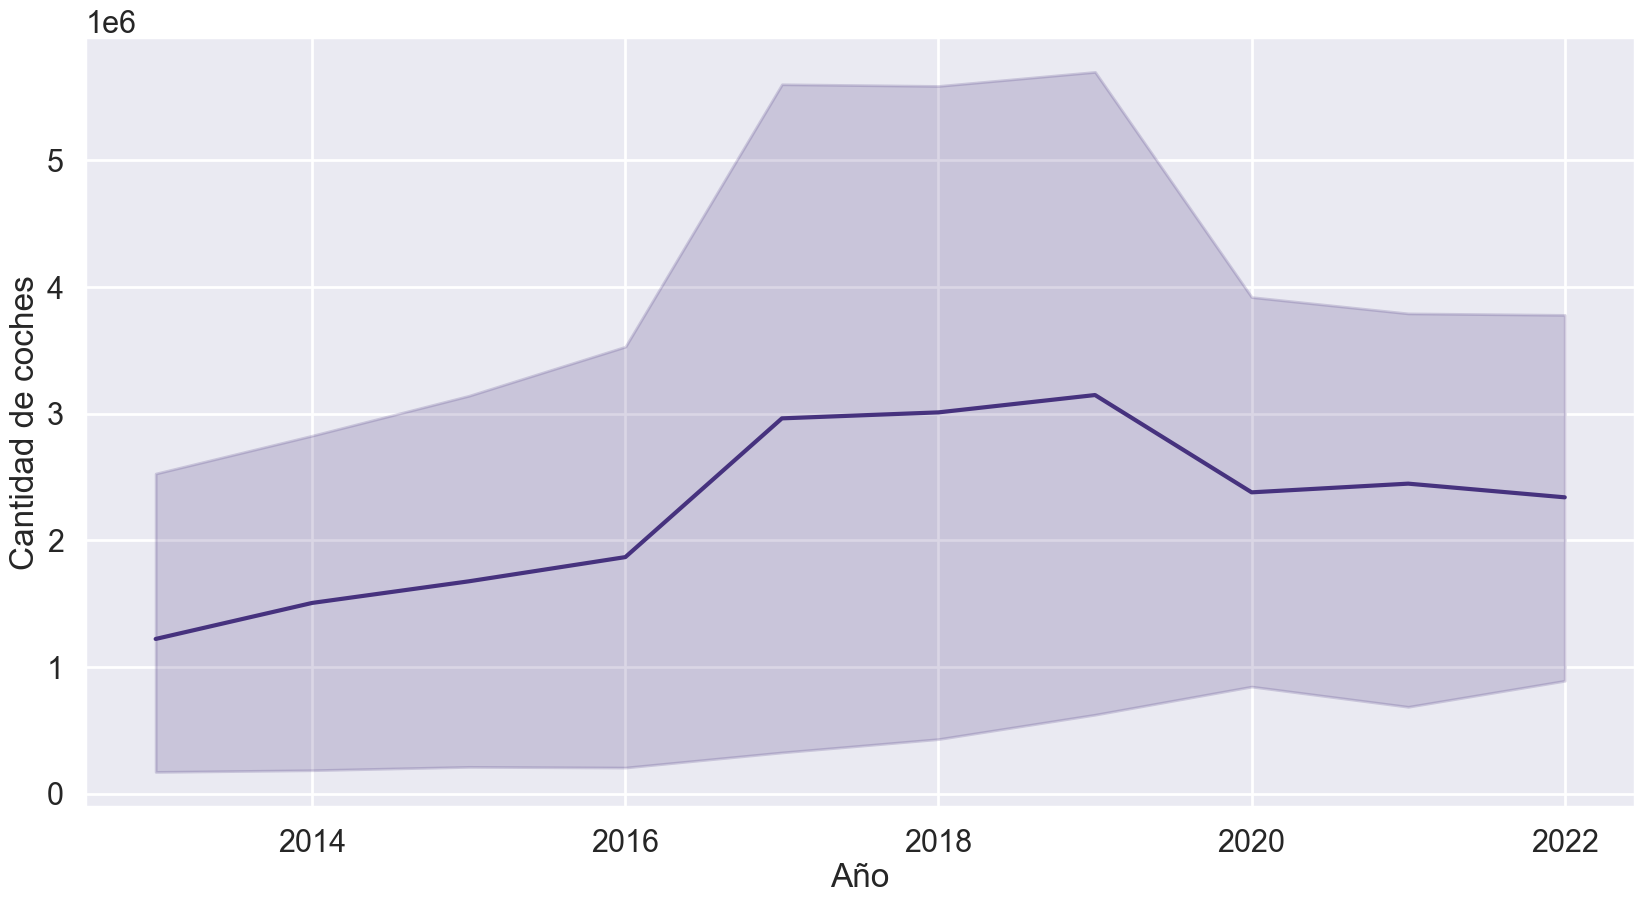

In [ ]:
# Seleccionar columnas relevantes (Año y sectores de emisión)
id_vars = ["TIME"]  # Columna de años
value_vars = df_new_cars.columns[1:5]  # Todas las demás columnas son sectores

# Convertir a formato largo
df_long = df_new_cars.melt(id_vars=id_vars, value_vars=value_vars, var_name="Motor", value_name="Cantidad de coches")

# Configurar el tamaño de la figura
plt.figure(figsize=(20,10))

# Crear gráfico de líneas
sns.lineplot(data=df_long, x="TIME", y="Cantidad de coches")  # alpha para mejorar visibilidad

# Etiquetas y título
#plt.title("Evolución de la matriculación de Nuevos coches")
plt.xlabel("Año")
plt.ylabel("Cantidad de coches")
plt.grid(True)
plt.show()

In [60]:
df_cars_park_plus_new = df_cars_park.merge(df_new_cars, on='TIME', how='inner', suffixes=(None, '_nuevos')).reset_index(drop=True)#.drop(columns='index', axis=1)

df_cars_park_plus_new["Porcentaje_Combustión"] = (
(df_cars_park_plus_new["Gasolina"] + df_cars_park_plus_new["Diesel"]) / 
df_cars_park_plus_new[["Gas_Bio_y_Bi-combustibles", "Gasolina", "Diesel", "Eléctricos_más_Hidrógeno", "Otros"]].sum(axis=1) * 100 ).round(2)

df_cars_park_plus_new

,TIME,Gas_Bio_y_Bi-combustibles,Eléctricos_más_Hidrógeno,Gasolina,Diesel,Otros,Gas_Bio_y_Bi-combustibles_nuevos,Eléctricos_más_Hidrógeno_nuevos,Gasolina_nuevos,Diesel_nuevos,Otros_nuevos,Porcentaje_Combustión
0,2013,6931564.0,281476.0,67795426.0,36683521.0,714507.0,214898.0,129552.0,1759604.0,2783435.0,30476.0,92.95
1,2014,7140919.0,451589.0,76912591.0,71752025.0,932856.0,232953.0,138254.0,2176478.0,3477677.0,32428.0,94.58
2,2015,4363751.0,826864.0,66433065.0,68391653.0,627710.0,213570.0,210601.0,2618876.0,3664274.0,38006.0,95.86
3,2016,4506718.0,1099284.0,68636414.0,71210778.0,694920.0,174293.0,239084.0,3175756.0,3882988.0,53711.0,95.69
4,2017,4588132.0,1736458.0,100676997.0,90375941.0,494892.0,203155.0,448747.0,5765771.0,5435460.0,6652.0,96.55
5,2018,4845350.0,2417408.0,106081702.0,93818922.0,471622.0,231732.0,635914.0,6584154.0,4590472.0,6622.0,96.28
6,2019,5072660.0,3373575.0,108139562.0,94010359.0,471125.0,252139.0,995937.0,7265619.0,4075878.0,7526.0,95.78
7,2020,5342633.0,5334123.0,108405255.0,93592889.0,491274.0,207302.0,1991232.0,4557309.0,2761380.0,2088.0,94.76
8,2021,5554020.0,8738852.0,108011923.0,92399916.0,533211.0,268510.0,3714258.0,3869164.0,1939659.0,4258.0,93.11
9,2022,5854719.0,12429691.0,110968329.0,93169033.0,580317.0,262278.0,4186941.0,3373144.0,1537136.0,5829.0,91.54


In [47]:
df_cars_park_plus_new = df_cars_park.merge(df_new_cars, on=['TIME', 'GEO_(Codes)'], how='inner', suffixes=(None, '_nuevos')).reset_index(drop=True)

df_cars_park_plus_new['Porcentaje_Combustión'] = (
(df_cars_park_plus_new['Gasolina'] + df_cars_park_plus_new['Diesel']) / 
df_cars_park_plus_new[['Gas_Bio_y_Bi', 'Eléctricos', 'Gasolina', 'Diesel', 'Otros']].sum(axis=1) * 100 ).round(2)

df_cars_park_plus_new.head(10)

,GEO_(Codes),TIME,Gas_Bio_y_Bi,Eléctricos,Gasolina,Diesel,Otros,Gas_Bio_y_Bi_nuevos,Eléctricos_nuevos,Gasolina_nuevos,Diesel_nuevos,Otros_nuevos,Porcentaje_Combustión
0,EU27_2020,2013,6931564.0,281476.0,67795426.0,36683521.0,714507.0,214898.0,129552.0,1759604.0,2783435.0,30476.0,92.95
1,EU27_2020,2014,7140919.0,451589.0,76912591.0,71752025.0,932856.0,232953.0,138254.0,2176478.0,3477677.0,32428.0,94.58
2,EU27_2020,2015,4363751.0,826864.0,66433065.0,68391653.0,627710.0,213570.0,210601.0,2618876.0,3664274.0,38006.0,95.86
3,EU27_2020,2016,4506718.0,1099284.0,68636414.0,71210778.0,694920.0,174293.0,239084.0,3175756.0,3882988.0,53711.0,95.69
4,EU27_2020,2017,4588132.0,1736458.0,100676997.0,90375941.0,494892.0,203155.0,448747.0,5765771.0,5435460.0,6652.0,96.55
5,EU27_2020,2018,4845350.0,2417408.0,106081702.0,93818922.0,471622.0,231732.0,635914.0,6584154.0,4590472.0,6622.0,96.28
6,EU27_2020,2019,5072660.0,3373575.0,108139562.0,94010359.0,471125.0,252139.0,995937.0,7265619.0,4075878.0,7526.0,95.78
7,EU27_2020,2020,5342633.0,5334123.0,108405255.0,93592889.0,491274.0,207302.0,1991232.0,4557309.0,2761380.0,2088.0,94.76
8,EU27_2020,2021,5554020.0,8738852.0,108011923.0,92399916.0,533211.0,268510.0,3714258.0,3869164.0,1939659.0,4258.0,93.11
9,EU27_2020,2022,5854719.0,12429691.0,110968329.0,93169033.0,580317.0,262278.0,4186941.0,3373144.0,1537136.0,5829.0,91.54


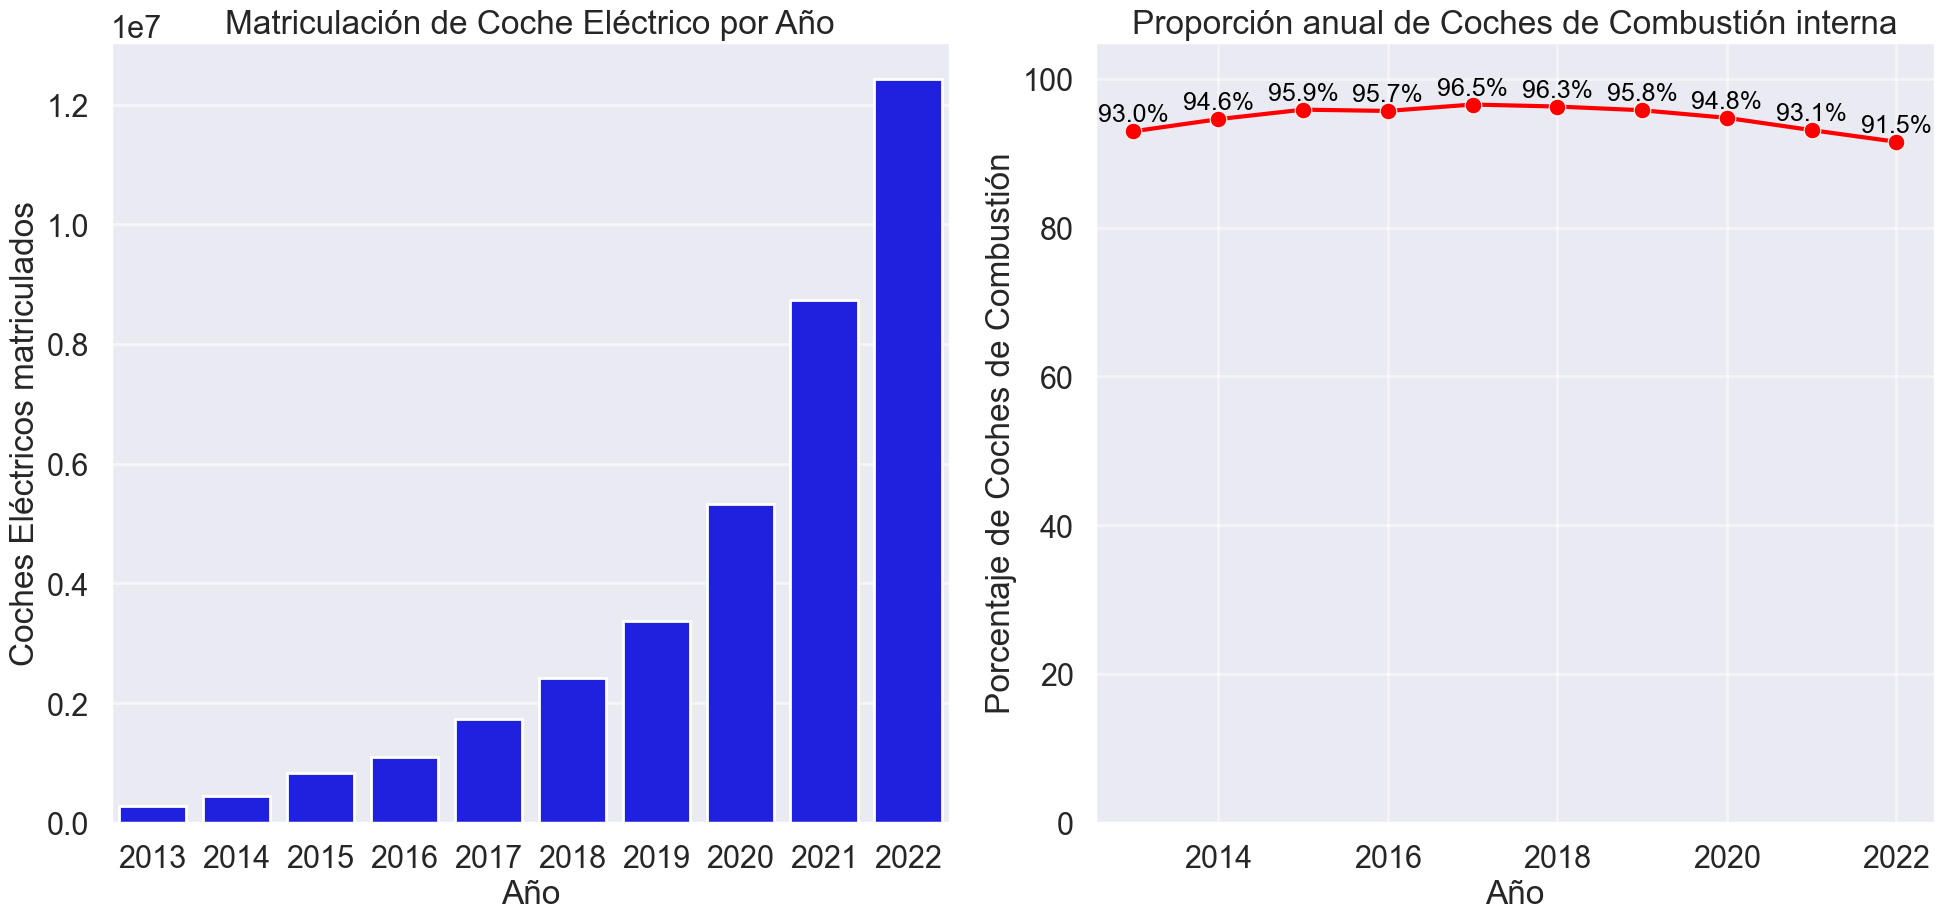

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(data=df_cars_park_plus_new, x='TIME', y='Eléctricos',
            color='blue', ax=ax1)
ax1.set_title('Matriculación de Coche Eléctrico por Año')
ax1.set_xlabel('Año')
ax1.set_ylabel('Coches Eléctricos matriculados')
ax1.grid(axis='y', alpha=0.6)

sns.lineplot(data=df_cars_park_plus_new, x='TIME', y='Porcentaje_Combustión',
             color='red', marker='o', ax=ax2)
ax2.set_title('Proporción anual de Coches de Combustión interna')
ax2.set_xlabel('Año')
ax2.set_ylabel('Porcentaje de Coches de Combustión')
ax2.set_ylim(0, 105)
ax2.grid(alpha=0.5)

for x, y in zip(df_cars_park_plus_new['TIME'], df_cars_park_plus_new['Porcentaje_Combustión']):
    ax2.text(x, y +1.3, f'{y:.1f}%', color='black', fontsize=18, ha='center')

plt.tight_layout()
plt.show()